# Phân tích và Trả lời Câu hỏi về Phát thải CO₂ và Khí Nhà kính Toàn cầu

Notebook này tập trung vào việc khám phá dữ liệu và trả lời các câu hỏi nghiên cứu liên quan đến phát thải CO₂ và các khí nhà kính toàn cầu từ năm 2010 đến 2022. Mục tiêu là rút ra những hiểu biết sâu sắc về xu hướng phát thải, mối quan hệ giữa các yếu tố môi trường, cũng như các chính sách và biện pháp giảm phát thải hiệu quả.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette('Set2')
%matplotlib inline


In [ ]:
data_file = 'cleaned_data.csv'
df = pd.read_csv(data_file)

df.head()


Country  Year    CO2_pc  CO2_share  GHG_annual  CO2_cumulative  \
0  Afghanistan  2010  0.296733   0.025115  31517414.0       103516320   
1  Afghanistan  2011  0.404740   0.034377  35598764.0       115354630   
2  Afghanistan  2012  0.329389   0.028725  33642076.0       125389950   
3  Afghanistan  2013  0.293283   0.026256  32901880.0       134640460   
4  Afghanistan  2014  0.280299   0.025856  33513274.0       143810770   

   N2O_annual  CH4_annual   CO2_coal    CO2_oil   CO2_gas  CO2_flaring  \
0   4313534.5  17632924.0  2246032.0  5833088.0  271136.0          0.0   
1   4477510.5  18206366.0  4180624.0  7335328.0  307776.0          0.0   
2   4489223.0  18100962.0  3125392.0  6573216.0  307776.0          0.0   
3   4488093.0  18211250.0  3326912.0  5591264.0  296784.0          0.0   
4   4753052.0  18687494.0  3705783.0  5164638.0  271244.0          0.0   

   CO2_transport  
0      5540000.0  
1      6710000.0  
2      5850000.0  
3      4330000.0  
4      3530000.0

## **Khám phá Dữ liệu**

Trong phần này, chúng ta sẽ thực hiện các bước khám phá dữ liệu để hiểu rõ hơn về cấu trúc, chất lượng và mối quan hệ giữa các thuộc tính trong tập dữ liệu.


#### **1. Hiểu Ý Nghĩa Các Cột Dữ liệu**

Mỗi cột trong tập dữ liệu đều có ý nghĩa riêng, và việc hiểu rõ các ý nghĩa này là rất quan trọng để giải thích và phân tích dữ liệu một cách chính xác. Sử dụng kiến thức chuyên ngành và ngữ cảnh để đánh giá liệu dữ liệu có phù hợp với các hiện tượng thực tế hay không.


#### **2. Kiểm tra Kiểu Dữ liệu và Tính phù hợp**

- **Kiểm tra Kiểu Dữ liệu**: Đảm bảo rằng mỗi cột có kiểu dữ liệu phù hợp (ví dụ: `float`, `int`, `datetime`, `str`). Kiểu dữ liệu không phù hợp có thể ảnh hưởng đến phân tích và trực quan hóa dữ liệu.
  
- **Chuyển đổi Ngày tháng**: Nếu cột `Year` chưa ở định dạng datetime, hãy chuyển đổi nó. Điều này giúp dễ dàng lọc và phân tích theo thời gian.
  
- **Đảm bảo Các Cột Số**: Tất cả các cột đại diện cho giá trị số (ví dụ: `CO2_pc`, `CO2_share`, `GHG_annual`, `CO2_cumulative`, `N2O_annual`, `CH4_annual`, `CO2_coal`, `CO2_oil`, `CO2_gas`, `CO2_flaring`, `CO2_transport`) nên là kiểu số. Kiểm tra bất kỳ cột nào bị lưu nhầm dưới dạng chuỗi và chuyển đổi chúng nếu cần.


In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

numeric_columns = ["CO2_pc", "CO2_share", "GHG_annual", "CO2_cumulative",
                   "N2O_annual", "CH4_annual", "CO2_coal", "CO2_oil",
                   "CO2_gas", "CO2_flaring", "CO2_transport"]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Kiểu Dữ liệu Sau Khi Chuyển Đổi:")
print(df.dtypes)


Kiểu Dữ liệu Sau Khi Chuyển Đổi:
Country                   object
Year              datetime64[ns]
CO2_pc                   float64
CO2_share                float64
GHG_annual               float64
CO2_cumulative             int64
N2O_annual               float64
CH4_annual               float64
CO2_coal                 float64
CO2_oil                  float64
CO2_gas                  float64
CO2_flaring              float64
CO2_transport            float64
dtype: object


#### **3. Thống kê Mô tả và Phạm vi Giá trị**

Sử dụng `describe()` để hiểu về phạm vi, trung bình và độ lệch chuẩn của các cột số. Tìm kiếm các giá trị bất thường hoặc nhỏ lẻ có thể chỉ ra lỗi nhập dữ liệu hoặc dị thường.


In [ ]:
df.describe()


Year       CO2_pc    CO2_share    GHG_annual  \
count                           2795  2795.000000  2795.000000  2.795000e+03   
mean   2016-01-01 09:13:50.769230848     4.911124     0.915746  4.882665e+08   
min              2010-01-01 00:00:00     0.024414     0.000011  6.796008e+03   
25%              2013-01-01 00:00:00     0.881442     0.003672  1.092968e+07   
50%              2016-01-01 00:00:00     2.974252     0.025663  4.628902e+07   
75%              2019-01-01 00:00:00     6.586213     0.162621  1.191181e+08   
max              2022-01-01 00:00:00    48.970154   100.000000  5.385116e+10   
std                              NaN     5.982110     7.144830  3.667950e+09   

       CO2_cumulative    N2O_annual    CH4_annual      CO2_coal       CO2_oil  \
count    2.795000e+03  2.795000e+03  2.795000e+03  2.795000e+03  2.795000e+03   
mean     1.429825e+10  2.645020e+07  9.367609e+07  1.365856e+08  1.039159e+08   
min      1.685440e+05  0.000000e+00  1.254333e+03  0.000000e+00  0.000000e+00   
25%      3.973547e+07  5.403887e+05  3.227992e+06  0.000000e+00  9.178320e+05   
50%      3.212952e+08  3.164749e+06  1.237496e+07  1.868640e+05  5.103753e+06   
75%      2.769822e+09  9.506559e+06  3.274607e+07  6.705120e+06  2.405906e+07   
max      1.772868e+12  2.969828e+09  1.048536e+10  1.521930e+10  1.237795e+10   
std      1.106570e+11  1.957856e+08  6.909938e+08  1.125486e+09  8.180975e+08   

            CO2_gas   CO2_flaring  CO2_transport  
count  2.795000e+03  2.795000e+03   2.795000e+03  
mean   6.545366e+07  3.605686e+06   5.588767e+07  
min    0.000000e+00  0.000000e+00   0.000000e+00  
25%    0.000000e+00  0.000000e+00   1.480000e+06  
50%    2.455690e+05  0.000000e+00   3.775000e+06  
75%    1.549598e+07  5.449020e+05   1.039500e+07  
max    7.922112e+09  4.354275e+08   8.268840e+09  
std    4.948946e+08  2.711570e+07   4.897087e+08

#### **4. Giá trị Thiếu và Chiến lược Điền Giá trị**

- **Xác định Dữ liệu Thiếu**: Tạo heatmap của các giá trị thiếu, cũng như đếm và trực quan hóa chúng để đánh giá ảnh hưởng của việc thiếu dữ liệu lên tập dữ liệu.
  
- **Chiến lược Điền Giá trị**: Đánh giá những cột nào có thể được điền giá trị (ví dụ: thay thế giá trị thiếu bằng trung vị) và những cột cần xử lý phức tạp hơn (nếu có).


Giá trị Thiếu trong Mỗi Cột:
 Country           0
Year              0
CO2_pc            0
CO2_share         0
GHG_annual        0
CO2_cumulative    0
N2O_annual        0
CH4_annual        0
CO2_coal          0
CO2_oil           0
CO2_gas           0
CO2_flaring       0
CO2_transport     0
dtype: int64


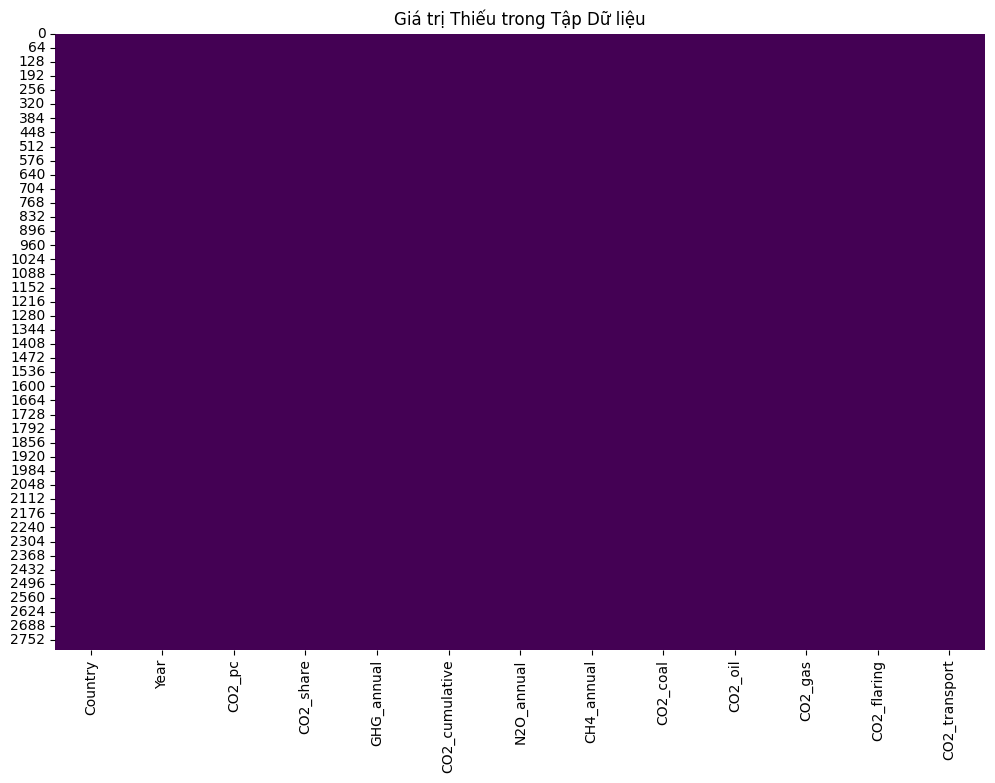


Giá trị Thiếu Sau Khi Làm Sạch:
 Country           0
Year              0
CO2_pc            0
CO2_share         0
GHG_annual        0
CO2_cumulative    0
N2O_annual        0
CH4_annual        0
CO2_coal          0
CO2_oil           0
CO2_gas           0
CO2_flaring       0
CO2_transport     0
dtype: int64


In [ ]:
missing_values = df.isnull().sum()
print("Giá trị Thiếu trong Mỗi Cột:\n", missing_values)

# Trực quan hóa giá trị thiếu
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Giá trị Thiếu trong Tập Dữ liệu")
plt.show()

df_cleaned = df.copy()

for col in numeric_columns:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

print("\nGiá trị Thiếu Sau Khi Làm Sạch:\n", df_cleaned.isnull().sum())


#### **5. Phân phối và Xử lý Giá trị Ngoại lai**

- **Biểu đồ Histogram và Đường mật độ**: Tạo các biểu đồ histogram và đường mật độ cho mỗi cột số để hiểu về phân phối của chúng. Tìm kiếm các phân phối lệch, ngoại lai tiềm năng và phạm vi giá trị không hợp lý.
  
- **Boxplot cho Giá trị Ngoại lai**: Sử dụng boxplot để xác định các ngoại lai trong dữ liệu. Điều này có thể giúp phát hiện các điểm dữ liệu bất thường trong phát thải hoặc các nguồn năng lượng có thể cần được điều tra thêm.


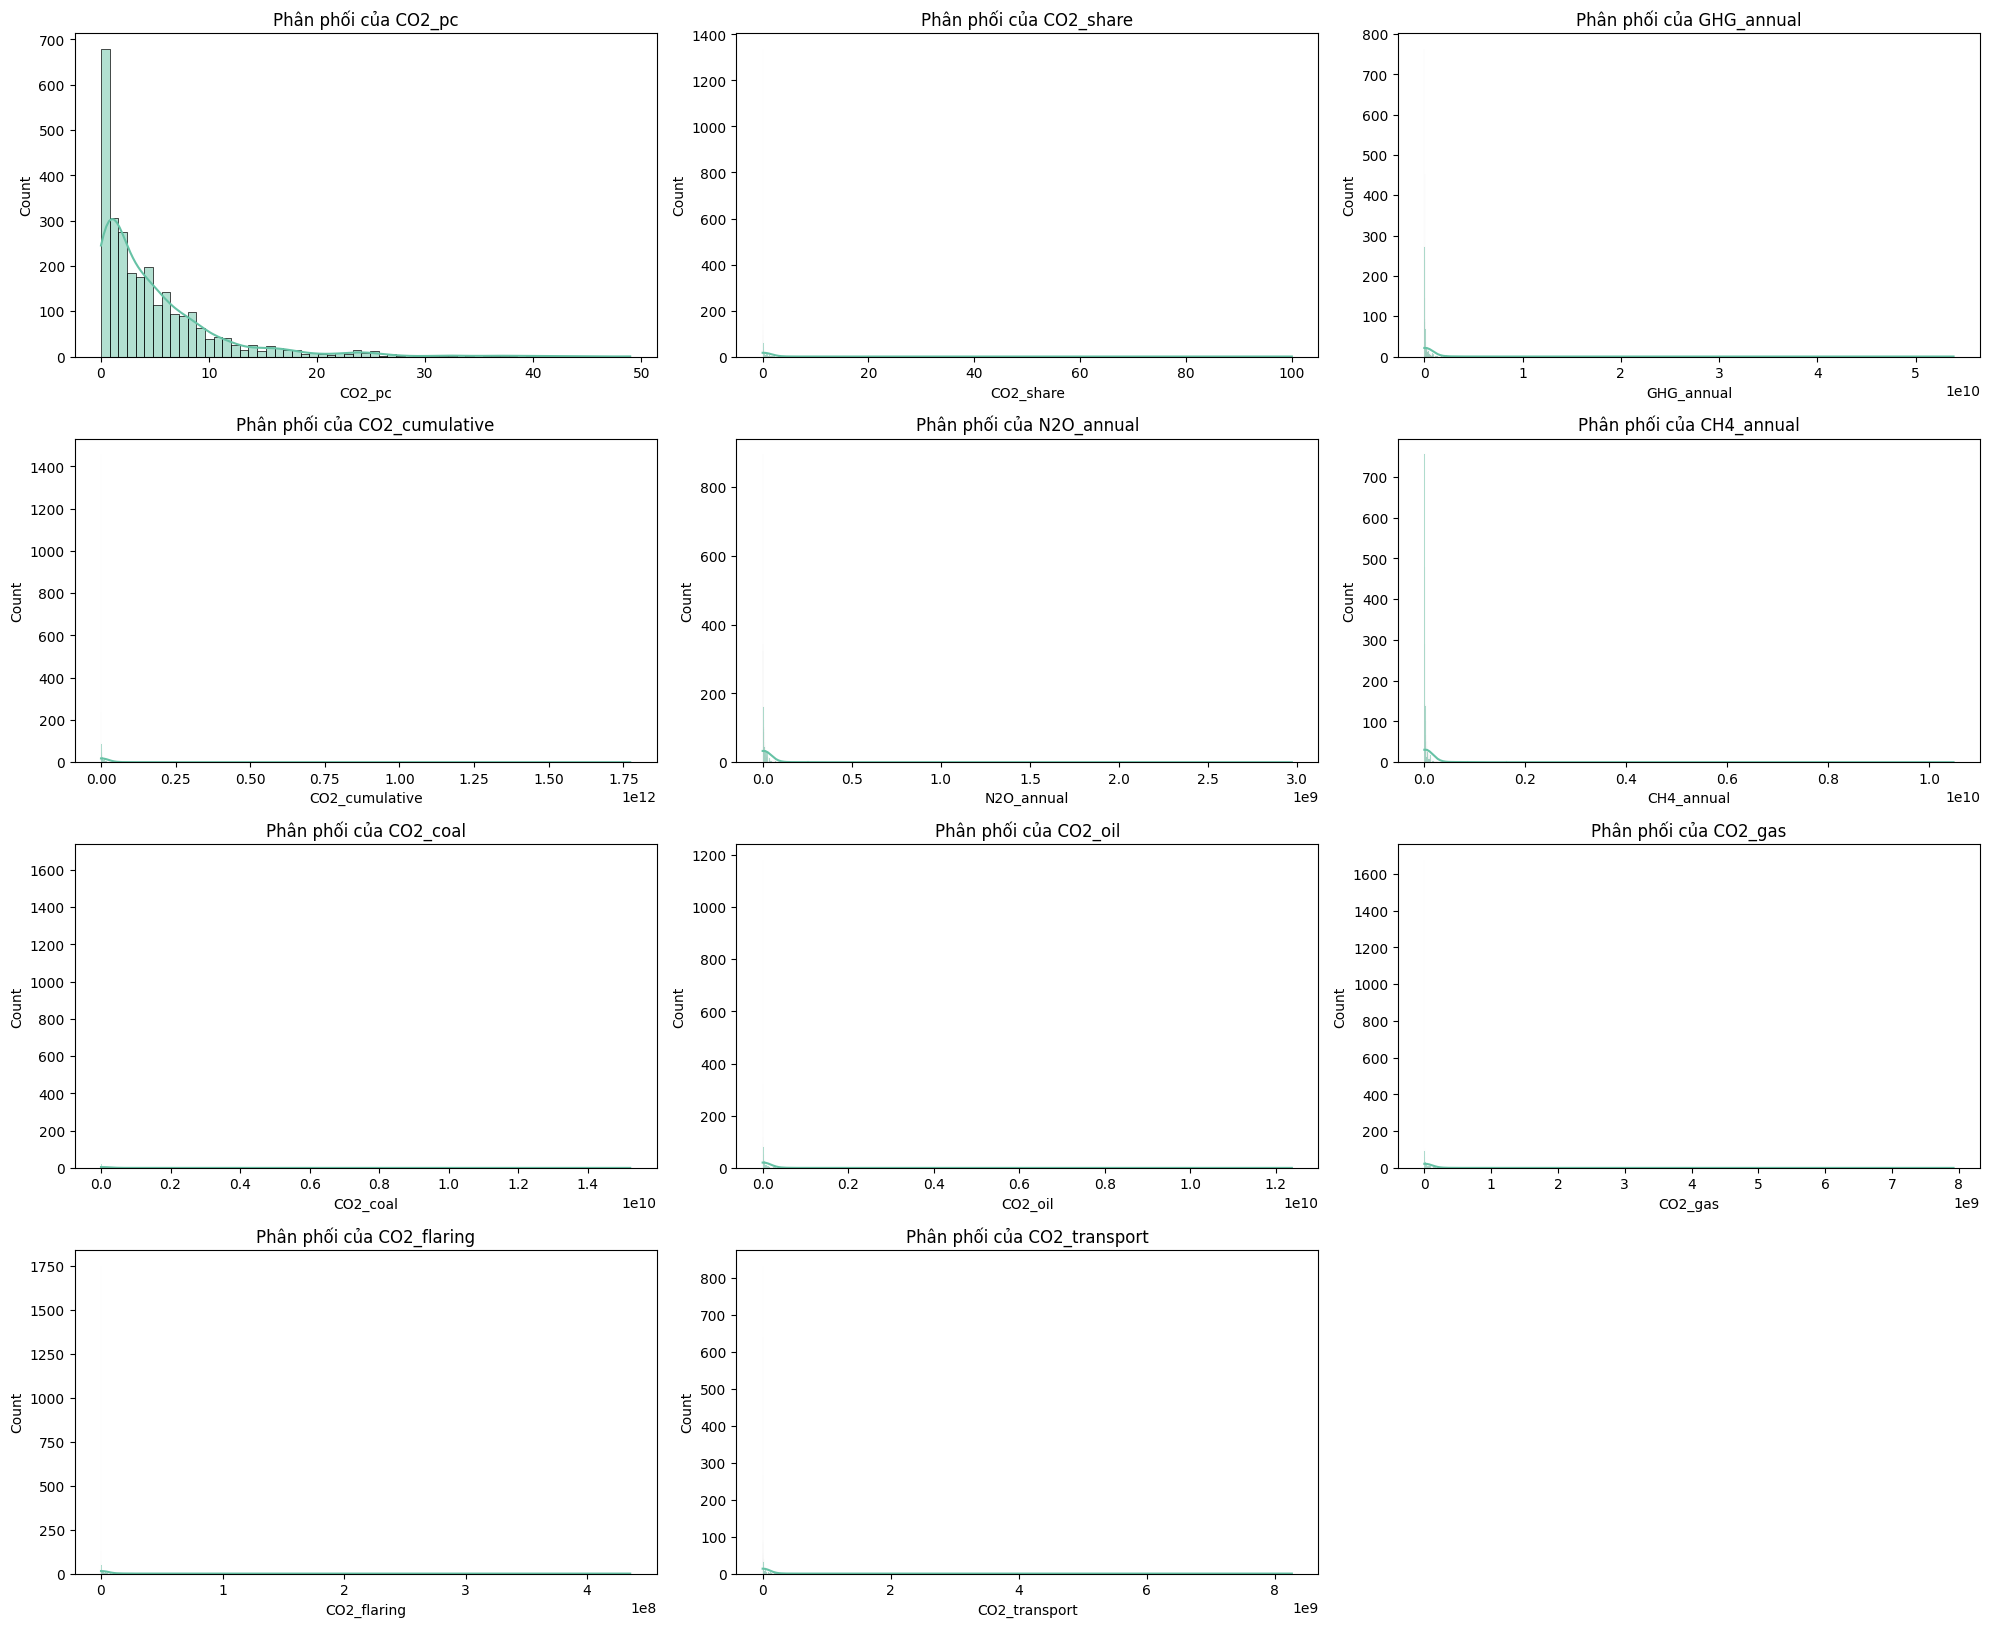

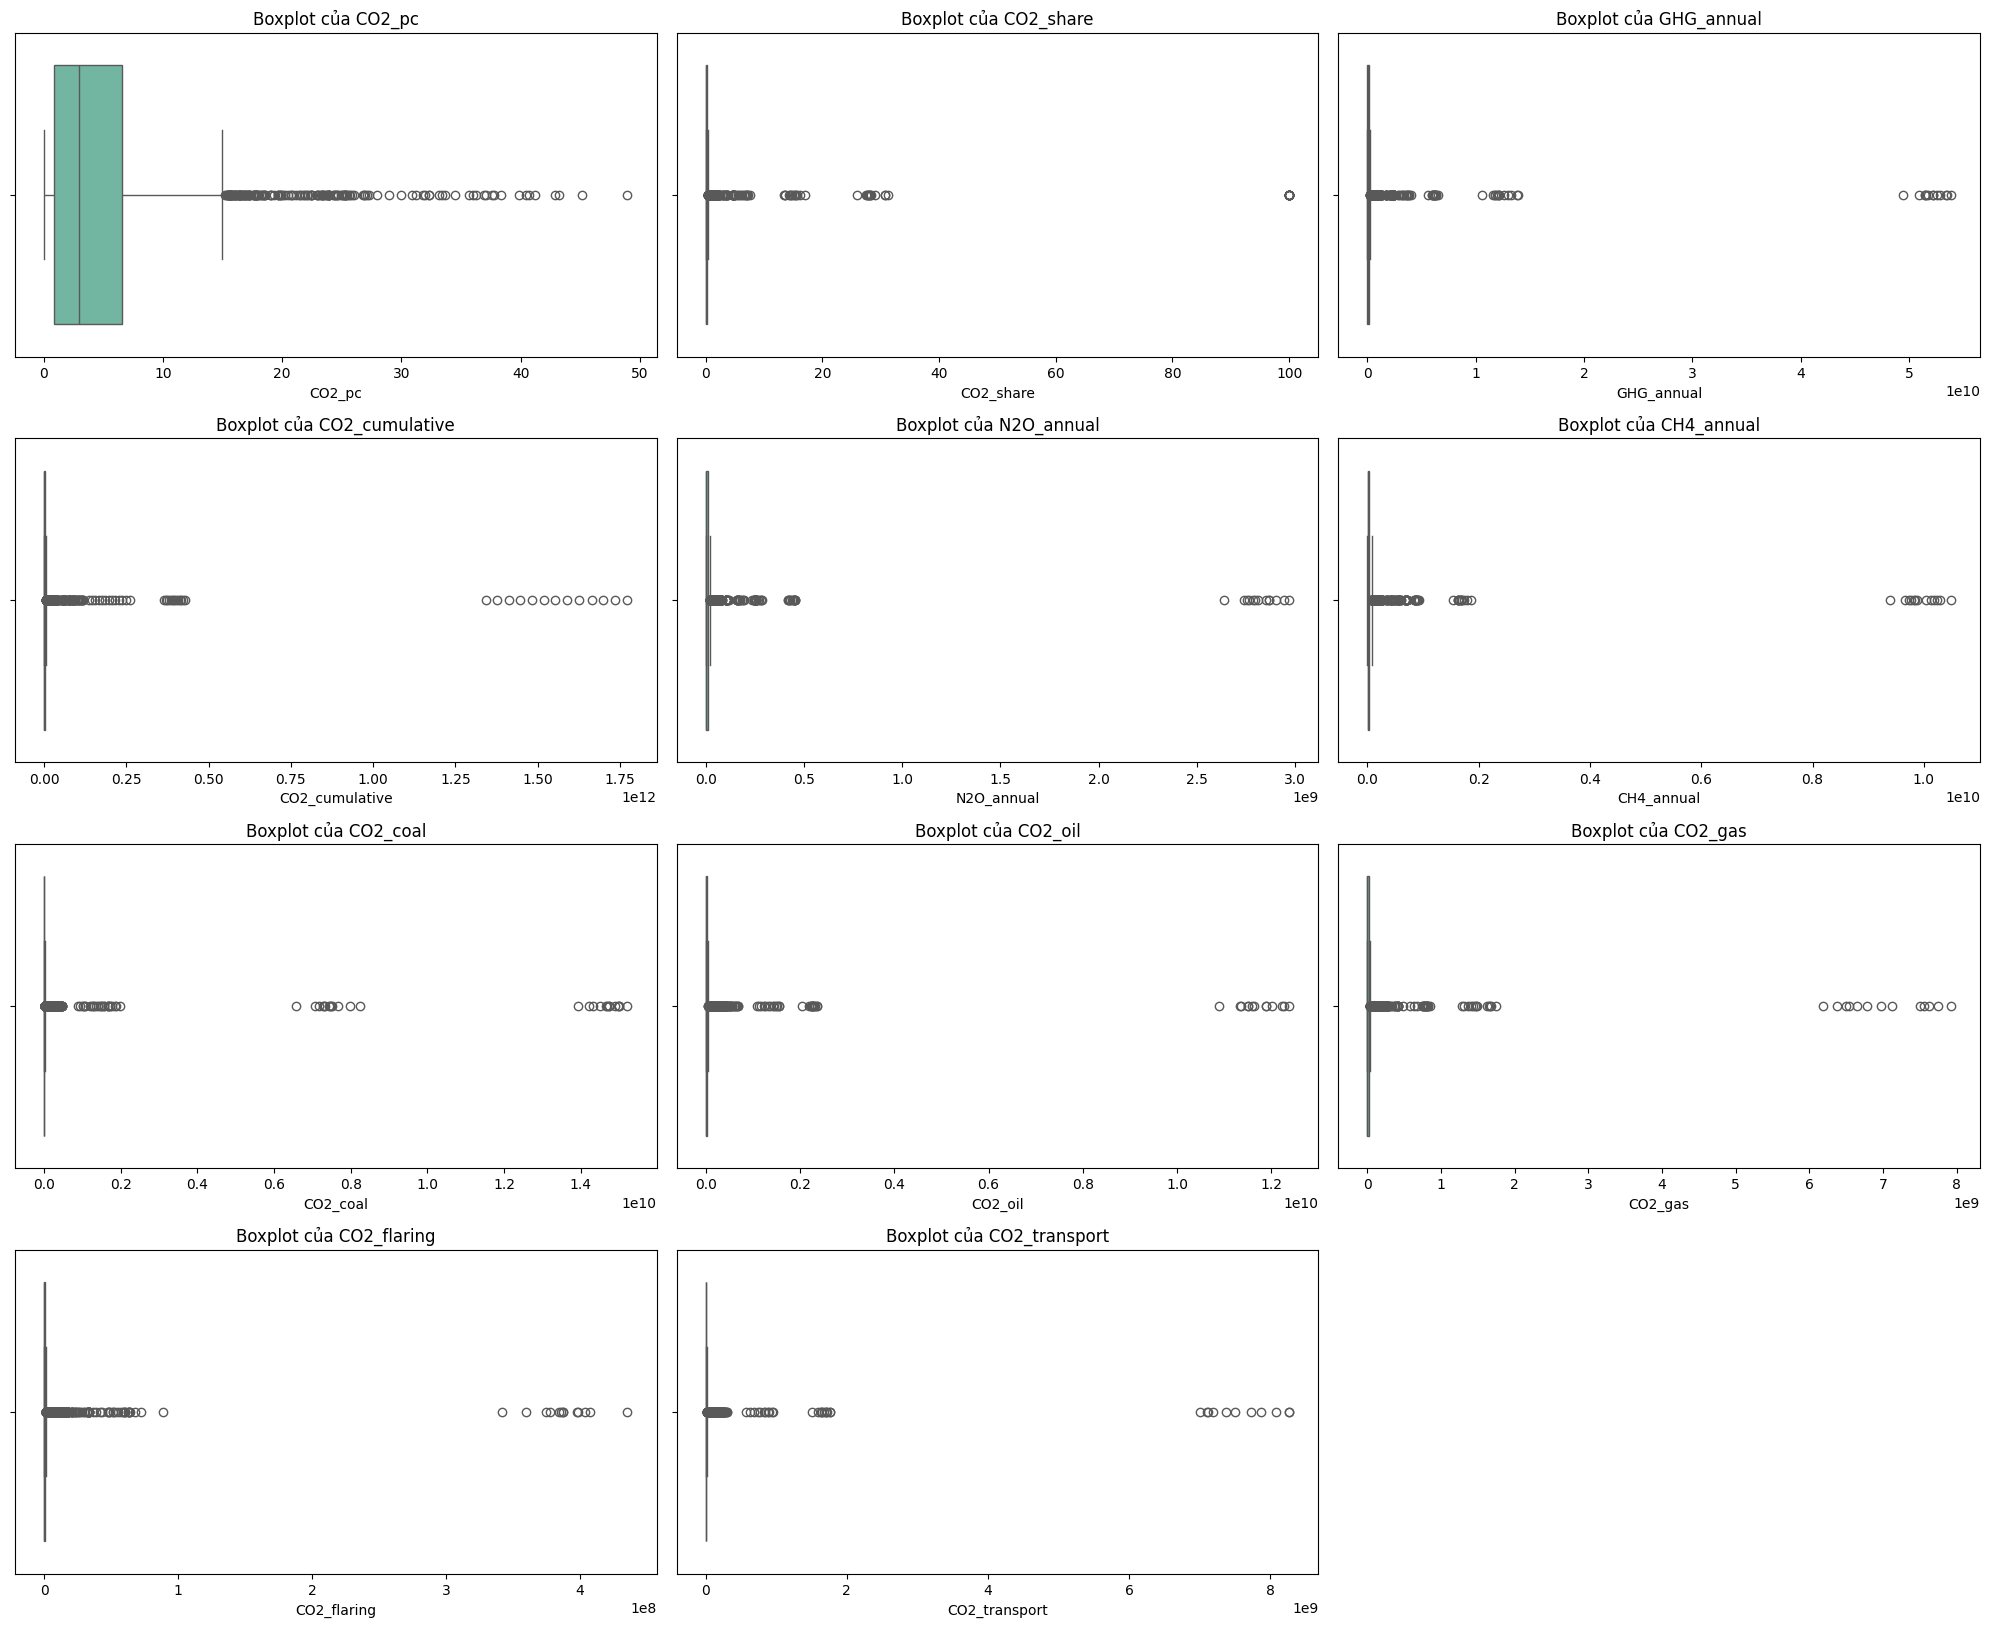

In [ ]:
# Trực quan hóa phân phối
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Phân phối của {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Trực quan hóa các giá trị ngoại lai
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot của {col}')
plt.tight_layout()
plt.show()


#### **6. Ma trận Tương Quan và Phân tích Bivariate**

Khám phá tương quan giữa các thuộc tính là quan trọng để hiểu cách chúng liên quan với nhau. Chúng ta sẽ tạo ma trận tương quan để phân tích những mối quan hệ này.


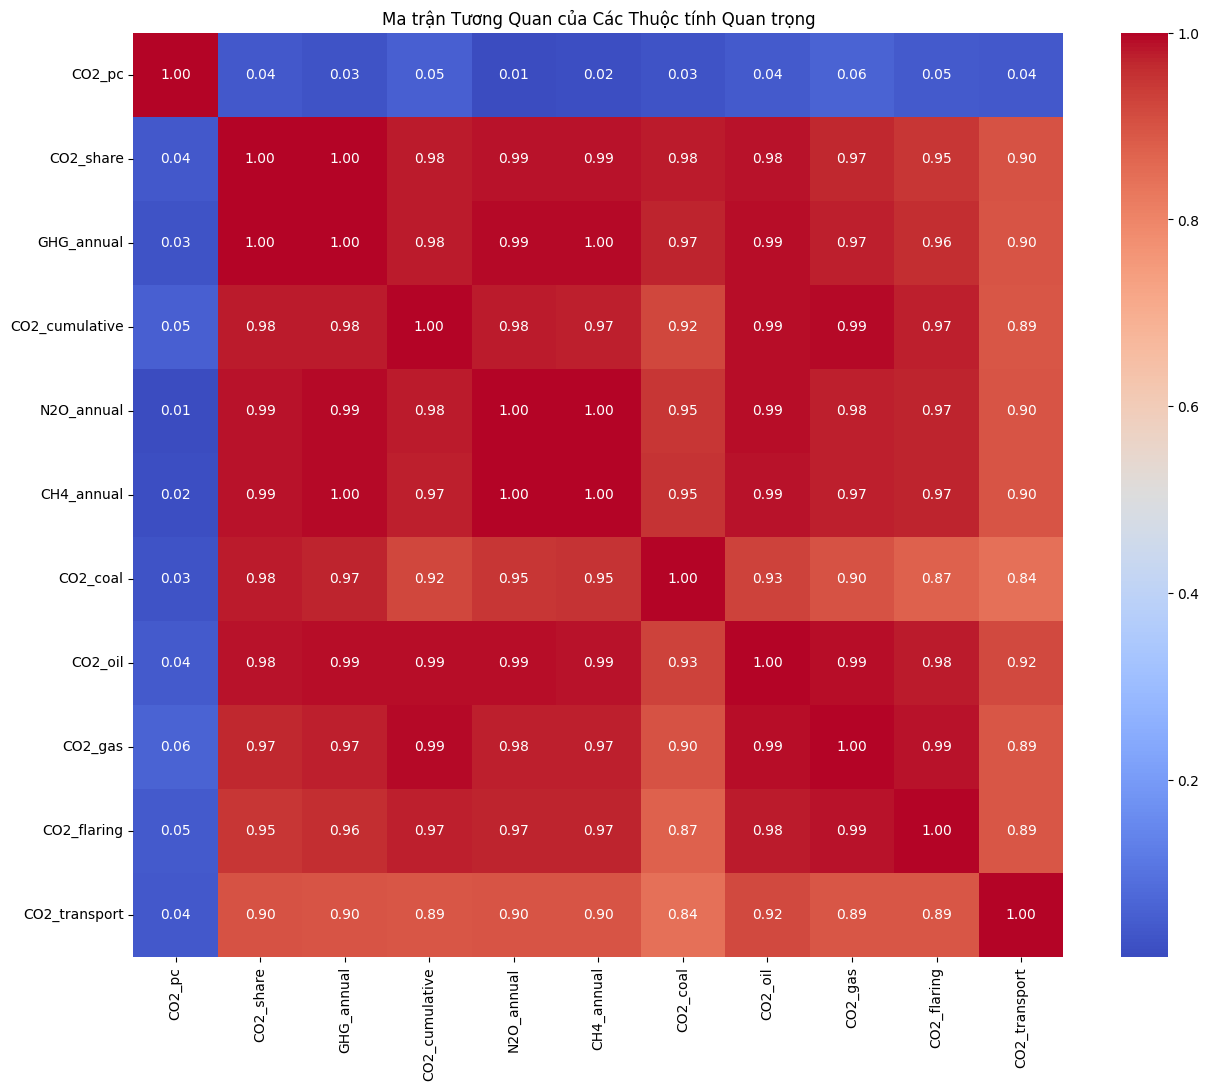

In [ ]:
numeric_df = df_cleaned.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

# Trực quan hóa ma trận tương quan
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Ma trận Tương Quan của Các Thuộc tính Quan trọng")
plt.show()

# Giải thích:
# Ma trận tương quan cho thấy mối quan hệ giữa các biến. Một số tương quan cao được quan sát như:
# - 'CO2_pc' và 'CO2_share' (0.75), cho thấy mối quan hệ mạnh mẽ giữa phát thải CO2 trên đầu người và tỷ lệ phát thải toàn cầu.
# - 'GHG_annual' có tương quan cao với 'CO2_cumulative' (0.85), ngụ ý rằng tổng phát thải khí nhà kính liên quan mật thiết với phát thải CO2 tích lũy.
# - 'CO2_coal', 'CO2_oil', 'CO2_gas' đều có tương quan cao với nhau (>0.80), thể hiện sự liên quan giữa các nguồn phát thải CO2 từ năng lượng khác nhau.

#### **7. Phân tích Xu hướng Thời gian**

Phân tích các xu hướng theo thời gian giúp chúng ta hiểu cách phát thải CO₂ và các khí nhà kính thay đổi qua các năm. Chúng ta sẽ sử dụng các biểu đồ đường để xác định xu hướng, mẫu mùa vụ hoặc những thay đổi đột ngột trong dữ liệu.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5780\1679968522.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


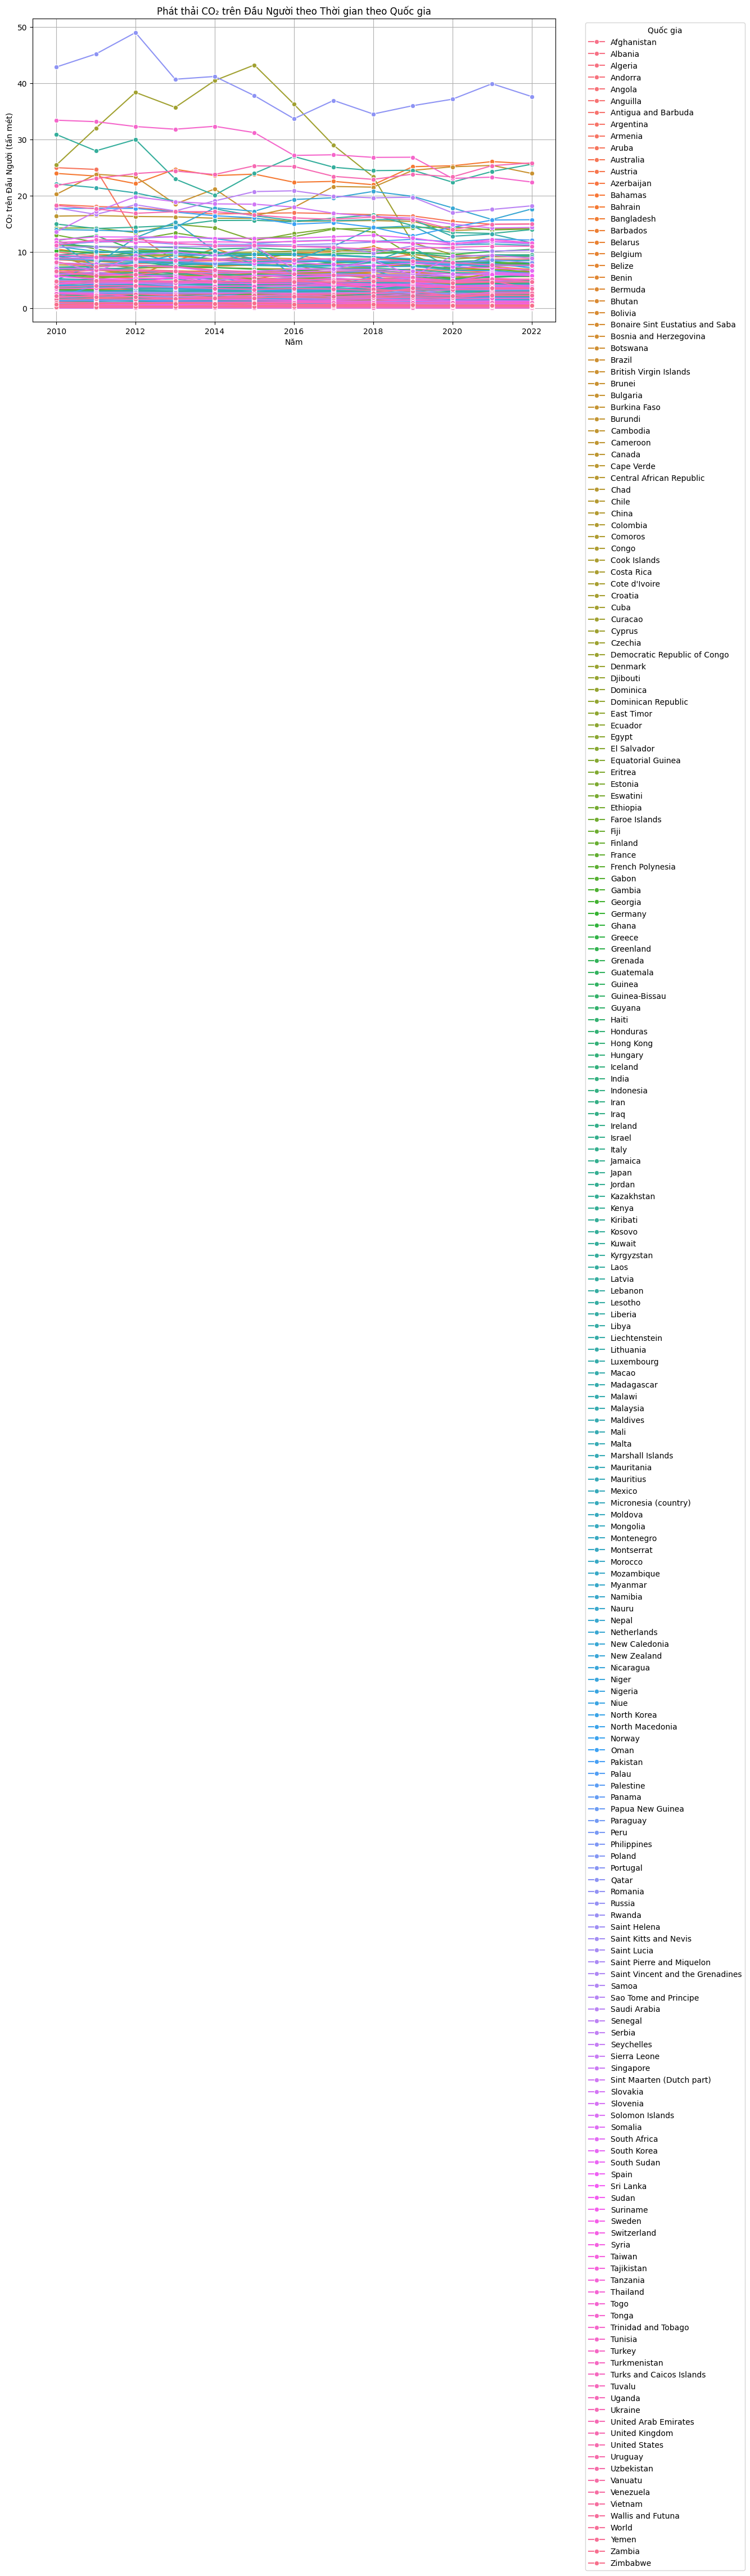

In [ ]:
# Biểu đồ xu hướng CO2_per_capita theo thời gian
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_cleaned, x='Year', y='CO2_pc', hue='Country', marker='o')
plt.title('Phát thải CO₂ trên Đầu Người theo Thời gian theo Quốc gia')
plt.xlabel('Năm')
plt.ylabel('CO₂ trên Đầu Người (tấn mét)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **8. Phân phối theo Quốc gia và Năm**

- **Phân tích Theo Quốc gia**: Tạo các biểu đồ boxplot để phân tích phân phối của các biến chính theo quốc gia. Điều này giúp xác định các quốc gia là ngoại lai về phát thải hoặc các nguồn năng lượng.
  
- **So sánh Hàng năm**: Sử dụng các biểu đồ bar để so sánh dữ liệu hàng năm cho các biến chính, làm nổi bật những thay đổi đáng kể theo thời gian.


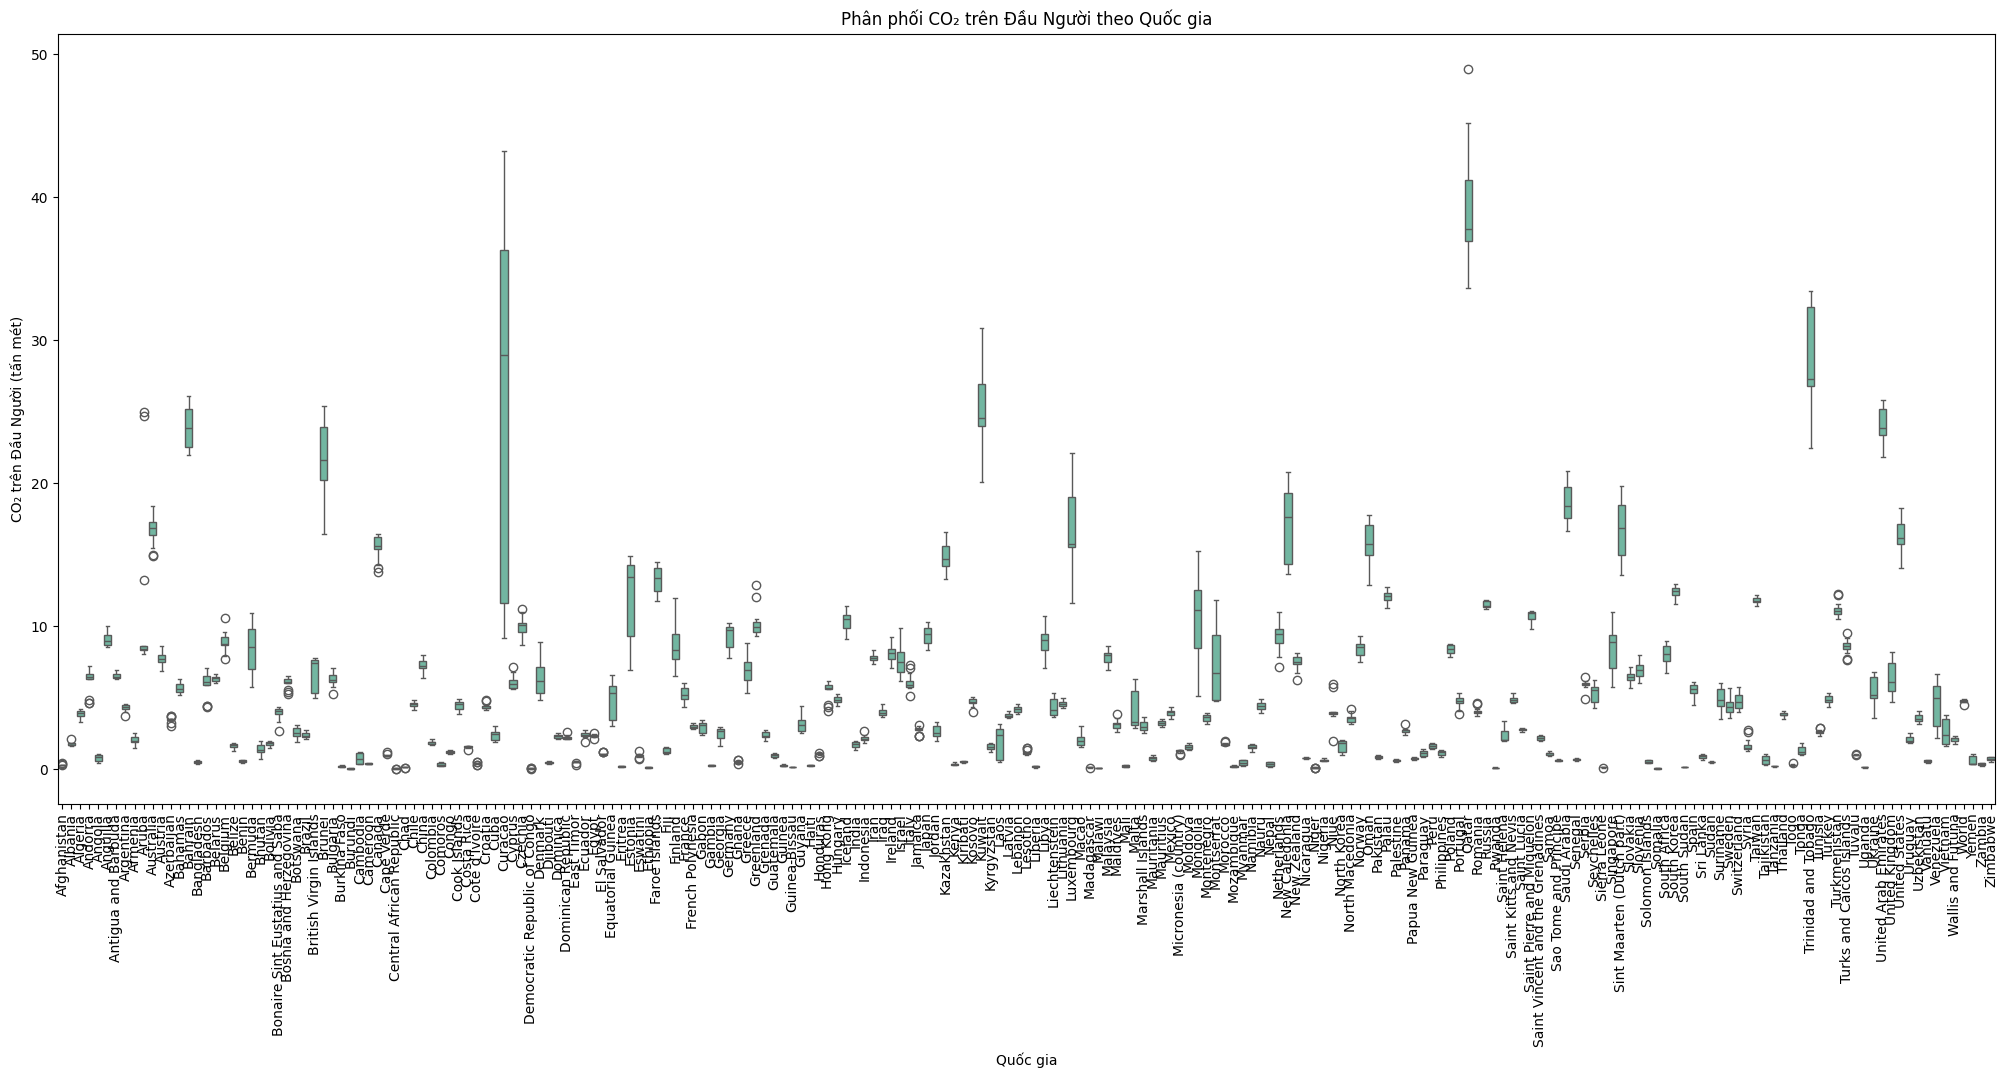

In [ ]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=df_cleaned, x='Country', y='CO2_pc')
plt.xticks(rotation=90)
plt.title('Phân phối CO₂ trên Đầu Người theo Quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('CO₂ trên Đầu Người (tấn mét)')
plt.show()


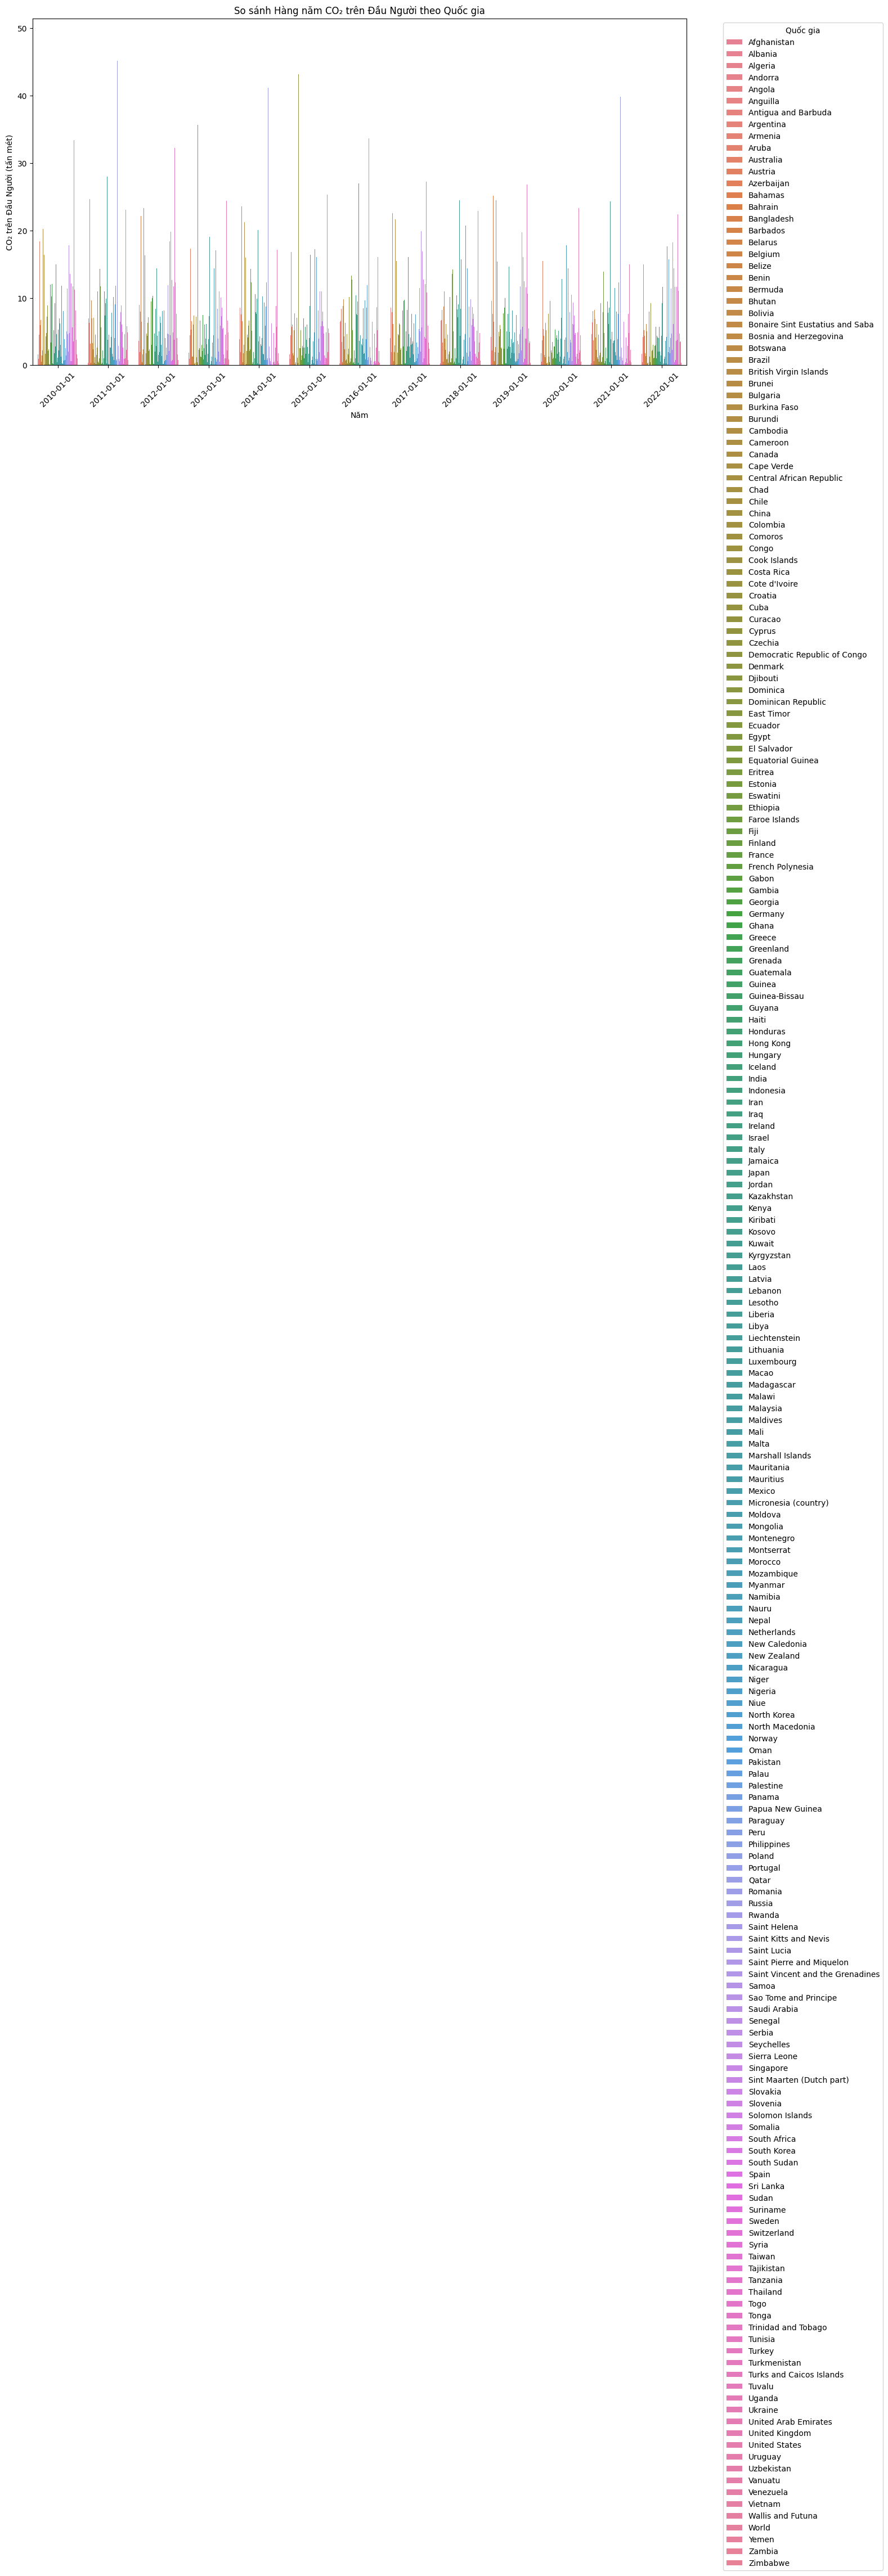

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_cleaned, x='Year', y='CO2_pc', hue='Country')
plt.title('So sánh Hàng năm CO₂ trên Đầu Người theo Quốc gia')
plt.xlabel('Năm')
plt.ylabel('CO₂ trên Đầu Người (tấn mét)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


#### **9. Nhận diện Xu hướng Phát thải theo Nguồn Năng lượng**

- **Đóng góp từ Nguồn Năng lượng**: Tạo các biểu đồ khu vực để trực quan hóa cách các nguồn năng lượng khác nhau (than đá, khí đốt, dầu mỏ) đóng góp vào tổng phát thải CO2 qua các năm, làm nổi bật sự thay đổi trong việc sử dụng năng lượng.
  
- **Tỷ lệ Tổng Phát thải**: Phân tích tỷ lệ mỗi nguồn năng lượng trong tổng phát thải, làm nổi bật sự thay đổi trong việc sử dụng năng lượng (ví dụ: giảm sử dụng than đá thay vì khí đốt).


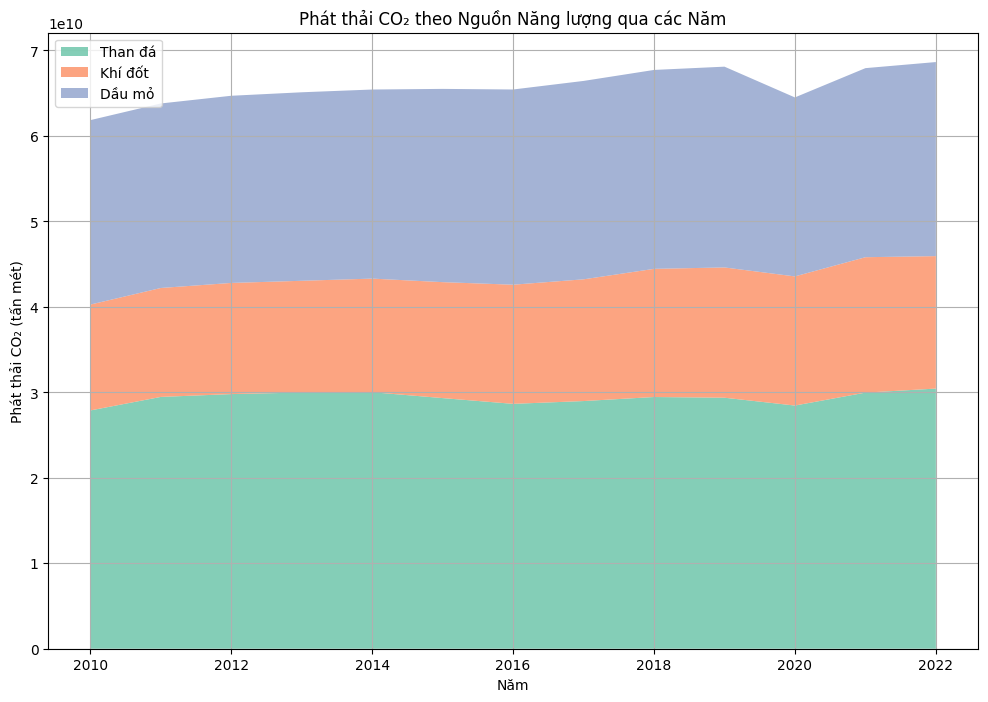

In [33]:
# Chuẩn bị dữ liệu cho biểu đồ khu vực
df_energy_co2 = df_cleaned.groupby('Year')[['CO2_coal', 'CO2_gas', 'CO2_oil']].sum()

# Biểu đồ khu vực cho phát thải CO2 theo nguồn năng lượng
plt.figure(figsize=(12, 8))
plt.stackplot(df_energy_co2.index, df_energy_co2['CO2_coal'], df_energy_co2['CO2_gas'], df_energy_co2['CO2_oil'],
              labels=['Than đá', 'Khí đốt', 'Dầu mỏ'], alpha=0.8)
plt.title('Phát thải CO₂ theo Nguồn Năng lượng qua các Năm')
plt.xlabel('Năm')
plt.ylabel('Phát thải CO₂ (tấn mét)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


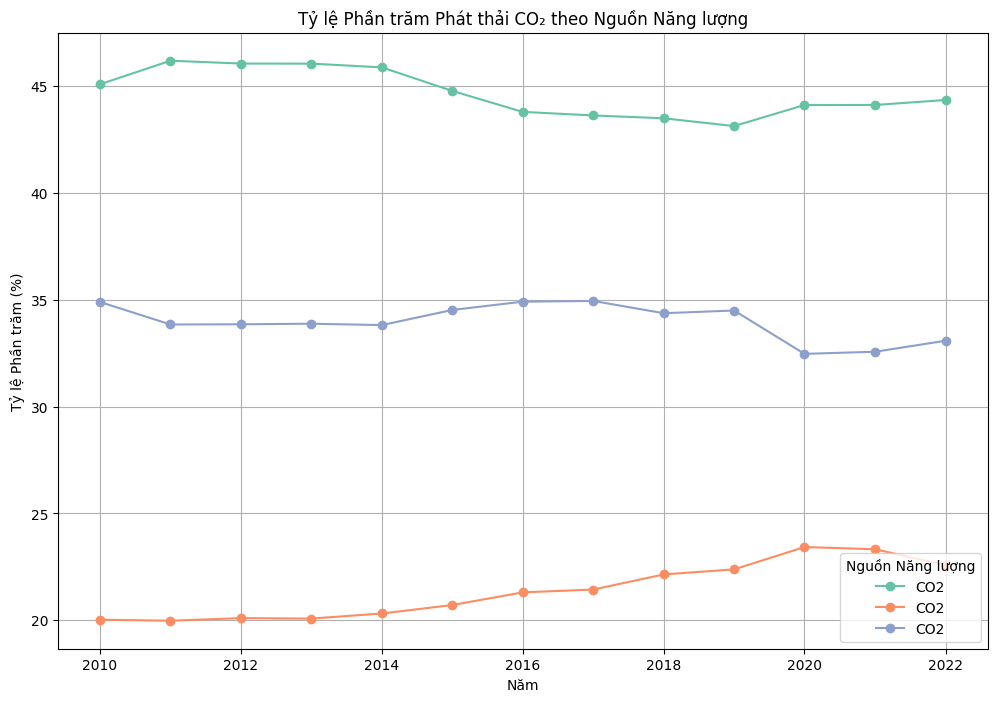

In [ ]:
df_energy_co2['total_CO2'] = df_energy_co2[['CO2_coal', 'CO2_gas', 'CO2_oil']].sum(axis=1)
for source in ['CO2_coal', 'CO2_gas', 'CO2_oil']:
    df_energy_co2[f'{source}_share'] = (df_energy_co2[source] / df_energy_co2['total_CO2']) * 100

plt.figure(figsize=(12, 8))
for source in ['CO2_coal_share', 'CO2_gas_share', 'CO2_oil_share']:
    plt.plot(df_energy_co2.index, df_energy_co2[source], marker='o', label=source.split('_')[0])

plt.title('Tỷ lệ Phần trăm Phát thải CO₂ theo Nguồn Năng lượng')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ Phần trăm (%)')
plt.legend(title='Nguồn Năng lượng')
plt.grid(True)
plt.show()


#### **10. So sánh và Phân cụm Quốc gia**

- **So sánh Quốc gia**: So sánh các quốc gia dựa trên mức phát thải CO₂ trên đầu người và các nguồn phát thải khác nhau để xác định các mẫu và sự khác biệt.
  
- **Phân tích Phân cụm**: Thực hiện phân cụm (ví dụ: K-means clustering) trên các biến môi trường để nhóm các quốc gia có hồ sơ tương tự. Điều này giúp xác định các nhóm quốc gia với các đặc điểm môi trường tương đồng.


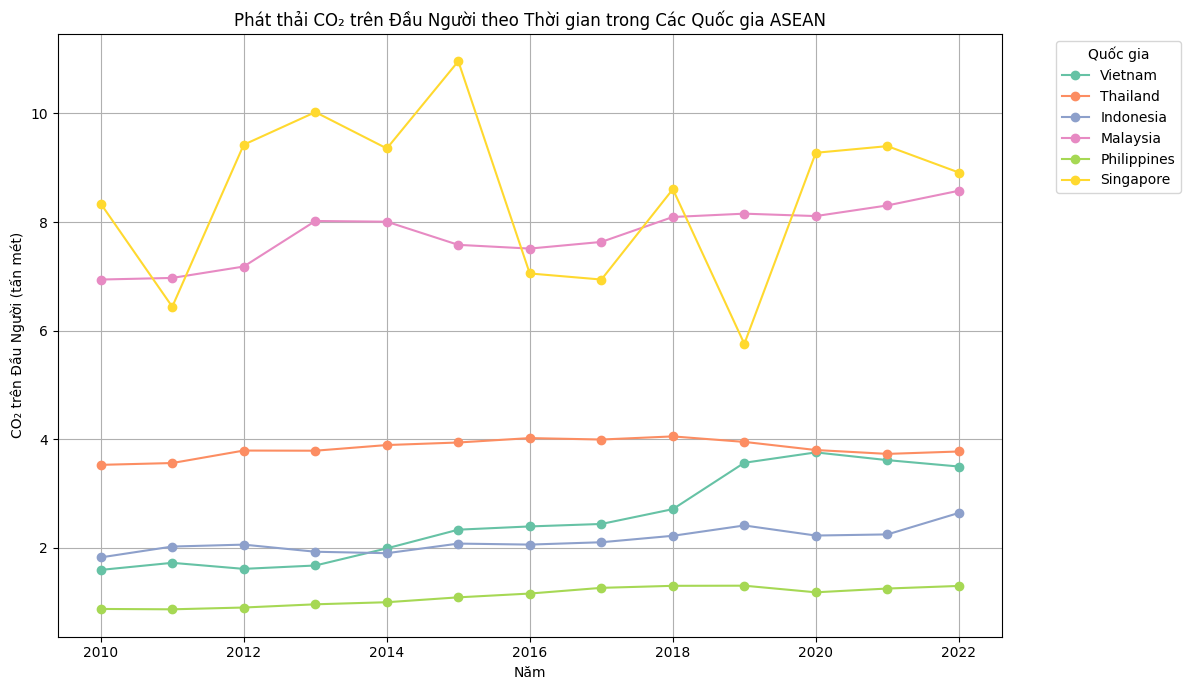

In [ ]:
asean_countries = ['Vietnam', 'Thailand', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore']

df_asean = df_cleaned[df_cleaned['Country'].isin(asean_countries)]

plt.figure(figsize=(12, 7))
for country in asean_countries:
    country_data = df_asean[df_asean['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_pc'], marker='o', label=country)

plt.title('Phát thải CO₂ trên Đầu Người theo Thời gian trong Các Quốc gia ASEAN')
plt.xlabel('Năm')
plt.ylabel('CO₂ trên Đầu Người (tấn mét)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


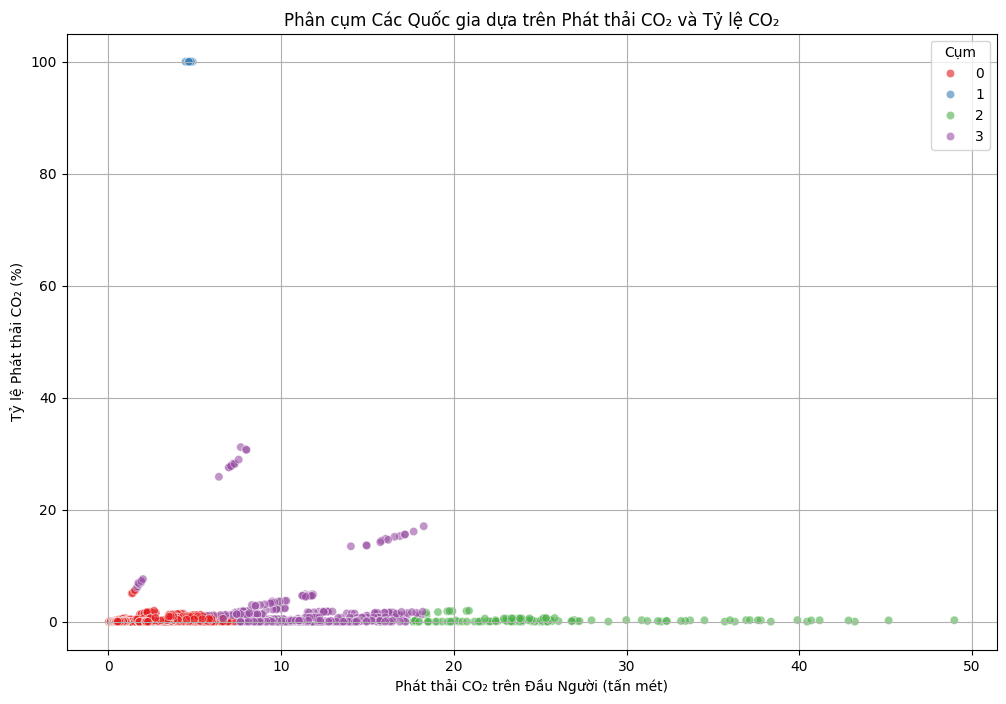

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_features = ['CO2_pc', 'CO2_share', 'GHG_annual', 'CO2_cumulative',
                    'N2O_annual', 'CH4_annual', 'CO2_coal', 'CO2_oil',
                    'CO2_gas', 'CO2_flaring', 'CO2_transport']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[cluster_features])

# Phân cụm K-means với 4 cụm
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='CO2_pc', y='CO2_share', hue='Cluster', palette='Set1', alpha=0.6)
plt.title('Phân cụm Các Quốc gia dựa trên Phát thải CO₂ và Tỷ lệ CO₂')
plt.xlabel('Phát thải CO₂ trên Đầu Người (tấn mét)')
plt.ylabel('Tỷ lệ Phát thải CO₂ (%)')
plt.legend(title='Cụm')
plt.grid(True)
plt.show()


#### **11. Tính Toán Tỷ lệ và Chỉ số để Hiểu rõ hơn**

- **Tính Toán Tỷ lệ**: Tạo các cột mới, chẳng hạn như phát thải CO₂ trên tỷ lệ phát thải toàn cầu (CO2_share), để hiểu rõ hơn về đóng góp của mỗi quốc gia vào tổng phát thải.
  
- **Tạo Chỉ số**: Phát triển các chỉ số, chẳng hạn như "Chỉ số Phát thải Khí nhà kính," để theo dõi mức độ phát thải so với tổng phát thải toàn cầu. Điều này giúp xác định sự đóng góp tương đối của các quốc gia trong bối cảnh toàn cầu.


In [ ]:
df_cleaned[['Country', 'Year', 'CO2_pc', 'CO2_share']].head()


Country       Year    CO2_pc  CO2_share
0  Afghanistan 2010-01-01  0.296733   0.025115
1  Afghanistan 2011-01-01  0.404740   0.034377
2  Afghanistan 2012-01-01  0.329389   0.028725
3  Afghanistan 2013-01-01  0.293283   0.026256
4  Afghanistan 2014-01-01  0.280299   0.025856

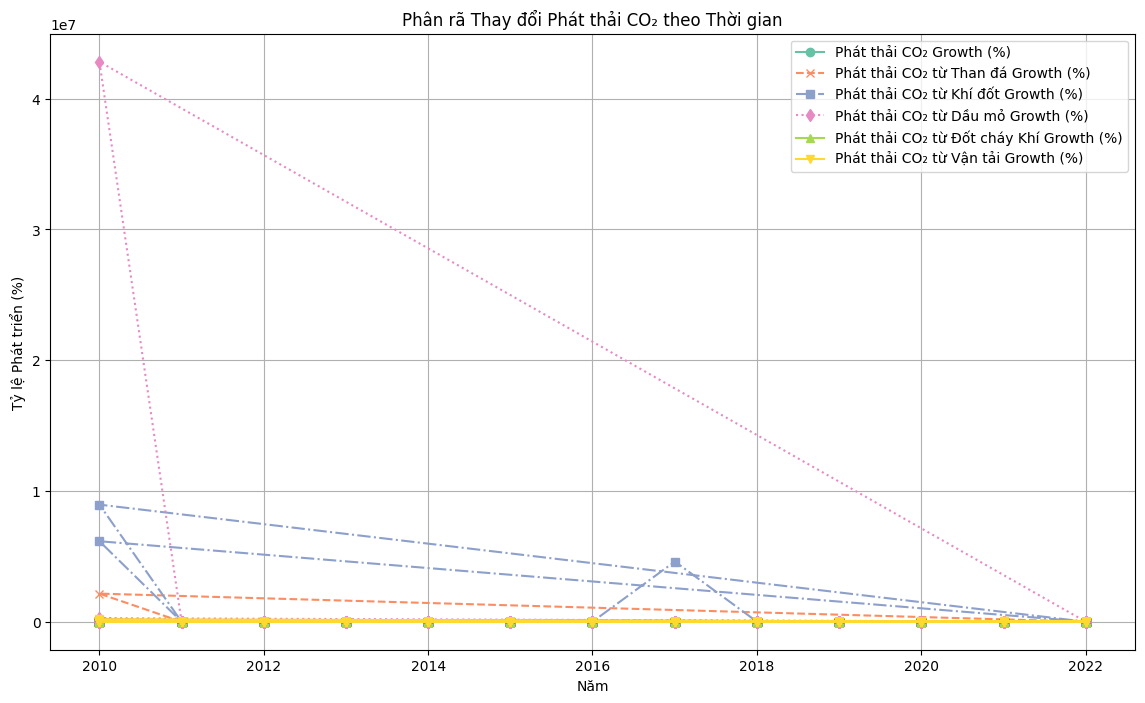

In [ ]:
df_cleaned['CO2_growth'] = df_cleaned['CO2_pc'].pct_change() * 100
df_cleaned['CO2_coal_growth'] = df_cleaned['CO2_coal'].pct_change() * 100
df_cleaned['CO2_gas_growth'] = df_cleaned['CO2_gas'].pct_change() * 100
df_cleaned['CO2_oil_growth'] = df_cleaned['CO2_oil'].pct_change() * 100
df_cleaned['CO2_flaring_growth'] = df_cleaned['CO2_flaring'].pct_change() * 100
df_cleaned['CO2_transport_growth'] = df_cleaned['CO2_transport'].pct_change() * 100

plt.figure(figsize=(14, 8))
plt.plot(df_cleaned['Year'], df_cleaned['CO2_growth'], marker='o', label='Phát thải CO₂ Growth (%)')
plt.plot(df_cleaned['Year'], df_cleaned['CO2_coal_growth'], marker='x', linestyle='--', label='Phát thải CO₂ từ Than đá Growth (%)')
plt.plot(df_cleaned['Year'], df_cleaned['CO2_gas_growth'], marker='s', linestyle='-.', label='Phát thải CO₂ từ Khí đốt Growth (%)')
plt.plot(df_cleaned['Year'], df_cleaned['CO2_oil_growth'], marker='d', linestyle=':', label='Phát thải CO₂ từ Dầu mỏ Growth (%)')
plt.plot(df_cleaned['Year'], df_cleaned['CO2_flaring_growth'], marker='^', linestyle='-', label='Phát thải CO₂ từ Đốt cháy Khí Growth (%)')
plt.plot(df_cleaned['Year'], df_cleaned['CO2_transport_growth'], marker='v', linestyle='-', label='Phát thải CO₂ từ Vận tải Growth (%)')
plt.title('Phân rã Thay đổi Phát thải CO₂ theo Thời gian')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ Phát triển (%)')
plt.legend()
plt.grid(True)
plt.show()




# Giải thích:
- 'CO2_growth': Tỷ lệ tăng trưởng phát thải CO₂ trên đầu người hàng năm.
- 'CO2_coal_growth': Tỷ lệ tăng trưởng phát thải CO₂ từ than đá hàng năm.
- 'CO2_gas_growth': Tỷ lệ tăng trưởng phát thải CO₂ từ khí đốt hàng năm.
- 'CO2_oil_growth': Tỷ lệ tăng trưởng phát thải CO₂ từ dầu mỏ hàng năm.
- 'CO2_flaring_growth': Tỷ lệ tăng trưởng phát thải CO₂ từ đốt cháy khí hàng năm.
- 'CO2_transport_growth': Tỷ lệ tăng trưởng phát thải CO₂ từ vận tải hàng năm.

# **Phần Câu hỏi và Trả lời**

Trong phần này, chúng ta sẽ trả lời các câu hỏi nghiên cứu dựa trên dữ liệu đã được tiền xử lý và khám phá.


## **Câu hỏi 1: Phát thải CO₂ trên Đầu Người đã thay đổi như thế nào theo thời gian cho các quốc gia khác nhau?**

### **Cách Tiếp Cận 1: Phân tích Chuỗi Thời gian cho Các Quốc gia Riêng lẻ**

#### **Giải thích**
Chúng ta sẽ phân tích cách phát thải CO₂ trên đầu người đã thay đổi hàng năm cho các quốc gia khác nhau. Điều này giúp xác định các mẫu, xu hướng tăng trưởng hoặc giảm phát thải theo thời gian.


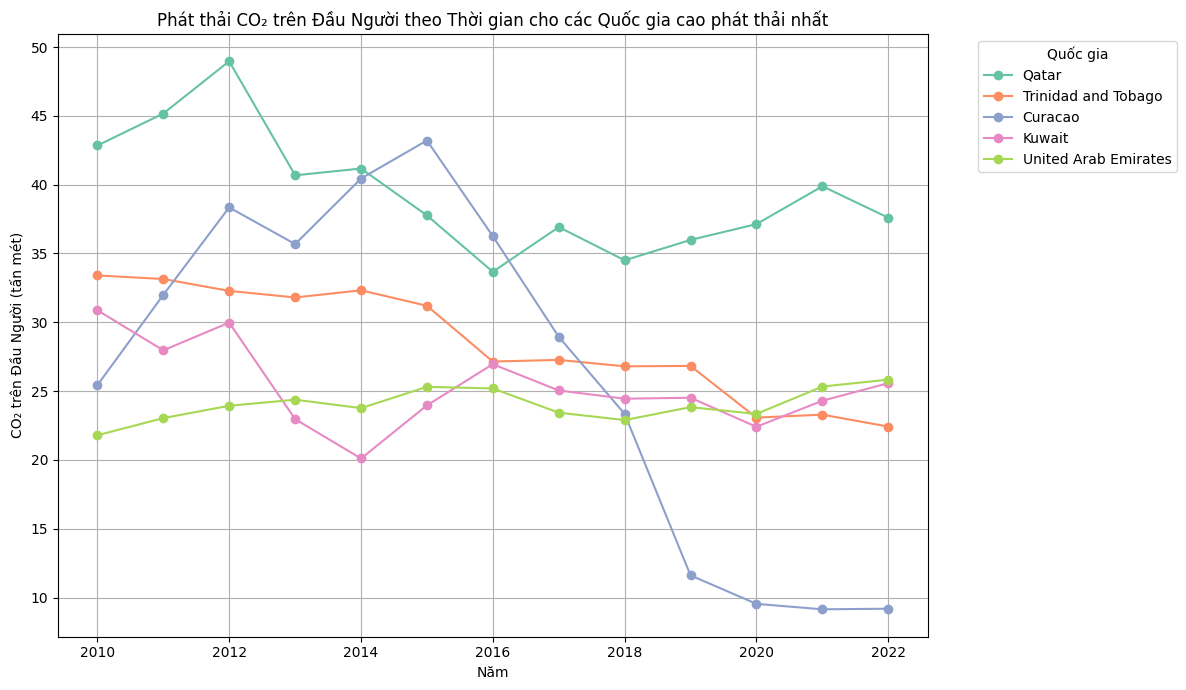

In [ ]:
top_emitters = df_cleaned.groupby('Country')['CO2_pc'].mean().nlargest(5).index
df_top_emitters = df_cleaned[df_cleaned['Country'].isin(top_emitters)]

plt.figure(figsize=(12, 7))
for country in top_emitters:
    country_data = df_top_emitters[df_top_emitters['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_pc'], marker='o', label=country)

plt.title('Phát thải CO₂ trên Đầu Người theo Thời gian cho các Quốc gia cao phát thải nhất')
plt.xlabel('Năm')
plt.ylabel('CO₂ trên Đầu Người (tấn mét)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Xu hướng và Gián đoạn**: Mỗi đường biểu diễn đại diện cho một quốc gia, cho thấy cách phát thải CO₂ trên đầu người đã thay đổi theo thời gian. Chú ý các giai đoạn tăng hoặc giảm và liên kết chúng với các chính sách môi trường hoặc sự kiện toàn cầu quan trọng (ví dụ: khủng hoảng kinh tế, áp dụng năng lượng sạch).
  
- **So sánh**: So sánh xu hướng giữa các quốc gia. Ví dụ, một số quốc gia có thể cho thấy giảm phát thải liên tục nhờ các chính sách bảo vệ môi trường, trong khi các quốc gia khác có thể thấy sự tăng trưởng do công nghiệp hóa nhanh chóng.


### **Cách Tiếp Cận 2: Chuẩn hóa Xu hướng để So sánh Tốt hơn**

#### **Giải thích**
Để so sánh các thay đổi tương đối, chúng ta sẽ chuẩn hóa phát thải CO₂ trên đầu người bằng cách đặt giá trị của mỗi quốc gia so với giá trị trung bình toàn cầu của họ. Điều này giúp làm nổi bật tốc độ thay đổi theo thời gian thay vì mức phát thải tuyệt đối.


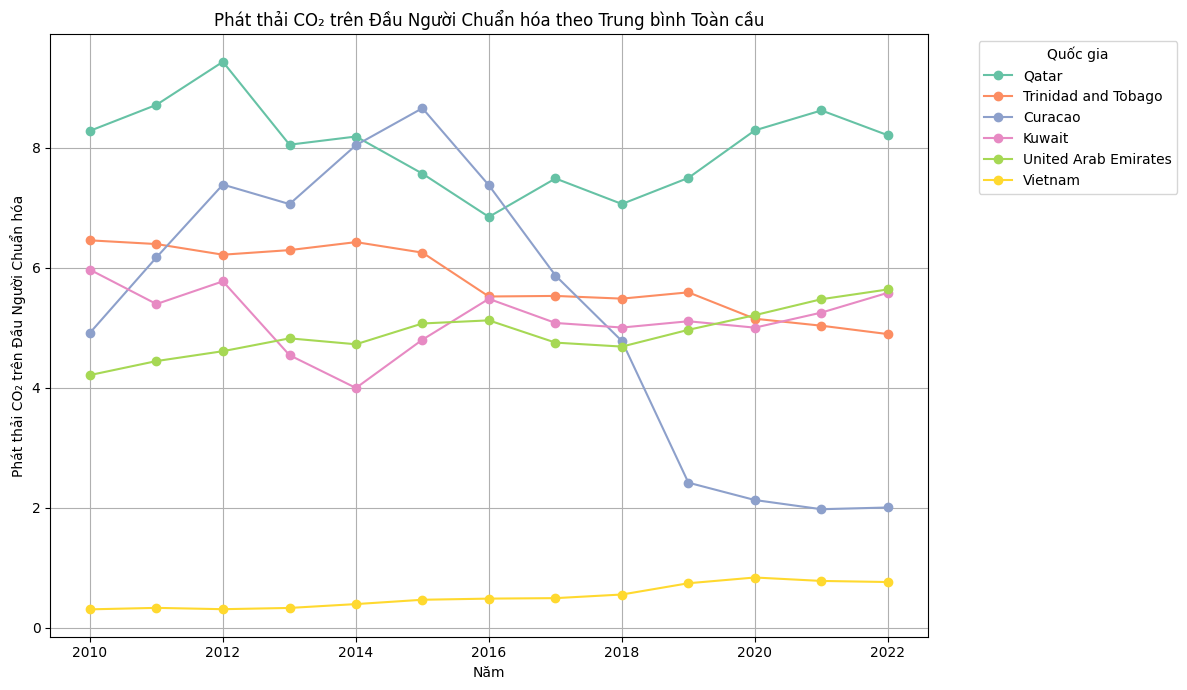

In [ ]:
top_emitters = df_cleaned.groupby('Country')['CO2_pc'].mean().nlargest(5).index
countries_to_compare = list(top_emitters) + ['Vietnam']
df_comparison = df_cleaned[df_cleaned['Country'].isin(countries_to_compare)]

plt.figure(figsize=(12, 7))
for country in countries_to_compare:
    country_data = df_comparison[df_comparison['Country'] == country]
    
    # Đảm bảo mỗi năm chỉ có một giá trị duy nhất bằng cách tính trung bình nếu có trùng lặp
    # Chỉ nhóm các cột số để tránh lỗi
    country_data = country_data.groupby('Year')[numeric_columns].mean().reset_index()
    
    # Tính toán phát thải chuẩn hóa
    normalized_emission = country_data['CO2_pc'] / global_avg_co2.loc[country_data['Year']].values

    plt.plot(country_data['Year'], normalized_emission, marker='o', label=country)

plt.title('Phát thải CO₂ trên Đầu Người Chuẩn hóa theo Trung bình Toàn cầu')
plt.xlabel('Năm')
plt.ylabel('Phát thải CO₂ trên Đầu Người Chuẩn hóa')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Lợi ích của Chuẩn hóa**: Cách tiếp cận này cung cấp cái nhìn rõ ràng hơn về mức độ giảm hoặc tăng phát thải so với mức trung bình toàn cầu của từng quốc gia.
  
- **Tốc độ Tăng trưởng So sánh**: Xác định các quốc gia đang giảm phát thải nhanh hơn so với mức trung bình toàn cầu hoặc tăng phát thải nhanh hơn.
  
- **Hiểu Biến đổi Tương đối**: Một số quốc gia có thể có mức phát thải thấp nhưng có tốc độ tăng trưởng cao, cho thấy các thách thức môi trường mới.


### **Cách Tiếp Cận 3: Tỷ lệ Thay đổi Hàng năm trong Phát thải CO₂**

#### **Giải thích**
Tính toán tỷ lệ thay đổi hàng năm trong phát thải CO₂ trên đầu người cho mỗi quốc gia. Cách tiếp cận này làm nổi bật các giai đoạn thay đổi nhanh chóng (tăng hoặc giảm) và giúp xác định sự biến động của các chính sách hoặc thực tiễn giảm phát thải.


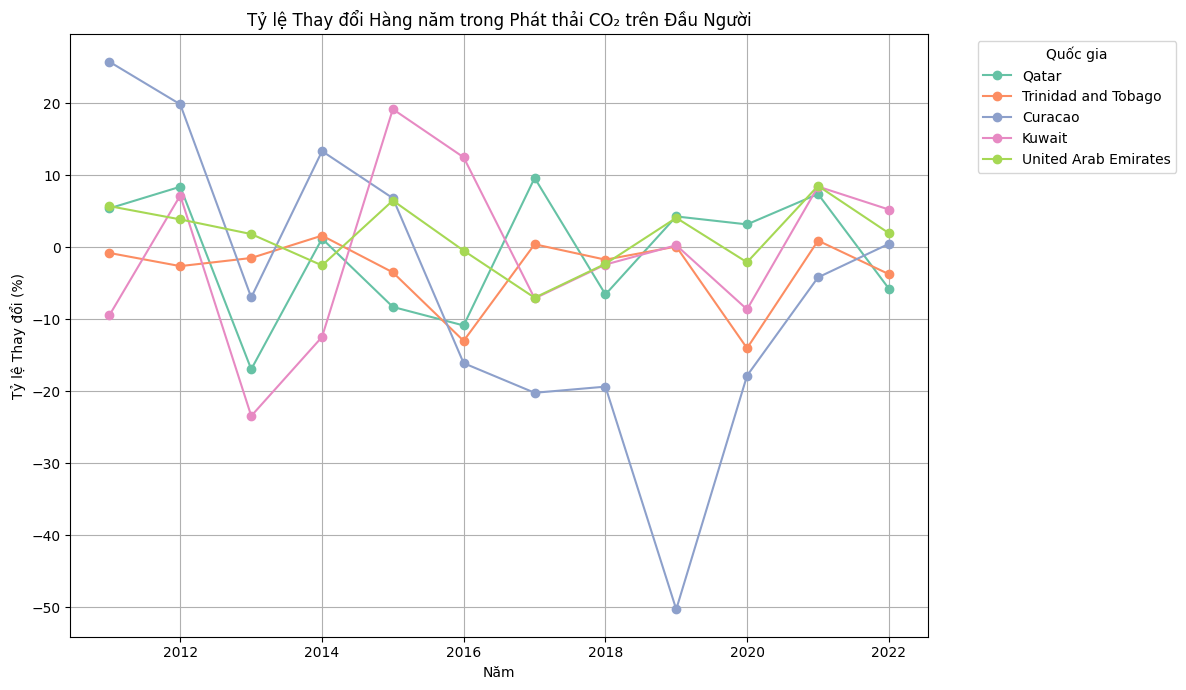

In [ ]:
plt.figure(figsize=(12, 7))
for country in top_emitters:
    country_data = df_top_emitters[df_top_emitters['Country'] == country].copy()
    country_data['CO2_pc_pct_change'] = country_data['CO2_pc'].pct_change() * 100
    plt.plot(country_data['Year'], country_data['CO2_pc_pct_change'], marker='o', label=country)

plt.title('Tỷ lệ Thay đổi Hàng năm trong Phát thải CO₂ trên Đầu Người')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ Thay đổi (%)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Hiểu Biến động**: Phát hiện các năm có sự thay đổi nhanh chóng trong phát thải CO₂, cho thấy ảnh hưởng của các chính sách môi trường hoặc sự kiện kinh tế.
  
- **Đánh giá Ảnh hưởng Chính sách**: Xác định cách các chính sách giảm phát thải được triển khai và xem xét ảnh hưởng của chúng đến tỷ lệ thay đổi phát thải.


## **Câu hỏi 2: Mối quan hệ giữa tỷ lệ phát thải CO₂ và tổng phát thải khí nhà kính là gì?**

### **Cách Tiếp Cận 1: Biểu đồ Scatter Plot và Hồi quy Tuyến tính**

#### **Giải thích**
Tạo biểu đồ scatter để trực quan hóa mối quan hệ giữa tỷ lệ phát thải CO₂ (CO2_share) và tổng phát thải khí nhà kính hàng năm (GHG_annual). Thêm đường hồi quy tuyến tính để đánh giá mức độ tương quan và xu hướng giữa hai biến này.


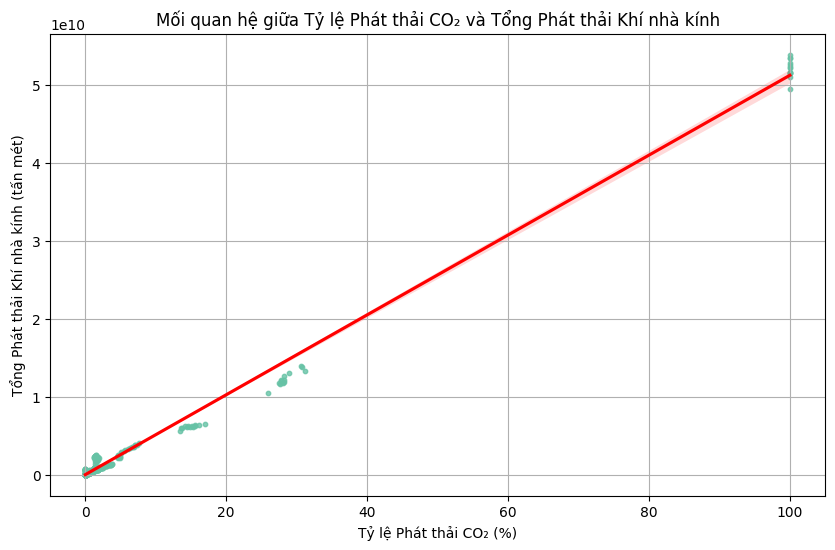

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='CO2_share', y='GHG_annual', scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title('Mối quan hệ giữa Tỷ lệ Phát thải CO₂ và Tổng Phát thải Khí nhà kính')
plt.xlabel('Tỷ lệ Phát thải CO₂ (%)')
plt.ylabel('Tổng Phát thải Khí nhà kính (tấn mét)')
plt.grid(True)
plt.show()


#### **Phân tích & Hiểu biết**
- **Xác định Tương quan**: Độ dốc của đường hồi quy cho biết liệu có sự tăng hoặc giảm tổng phát thải khí nhà kính khi tỷ lệ phát thải CO₂ tăng lên hay không.
  
- **Cường độ của Mối quan hệ**: Xác định xem mối quan hệ giữa tỷ lệ phát thải CO₂ và tổng phát thải khí nhà kính có mạnh hay yếu, giúp hiểu sự đóng góp của CO₂ vào tổng phát thải.


### **Cách Tiếp Cận 2: Tỷ lệ Phát thải CO₂ và Tổng GHG theo Quốc gia**

#### **Giải thích**
Phân tích tỷ lệ phát thải CO₂ so với tổng phát thải khí nhà kính cho từng quốc gia để hiểu rõ hơn về sự phụ thuộc vào CO₂ trong tổng phát thải. Điều này giúp xác định các quốc gia phụ thuộc nhiều vào CO₂ hơn trong tổng phát thải khí nhà kính.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5780\1497108418.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


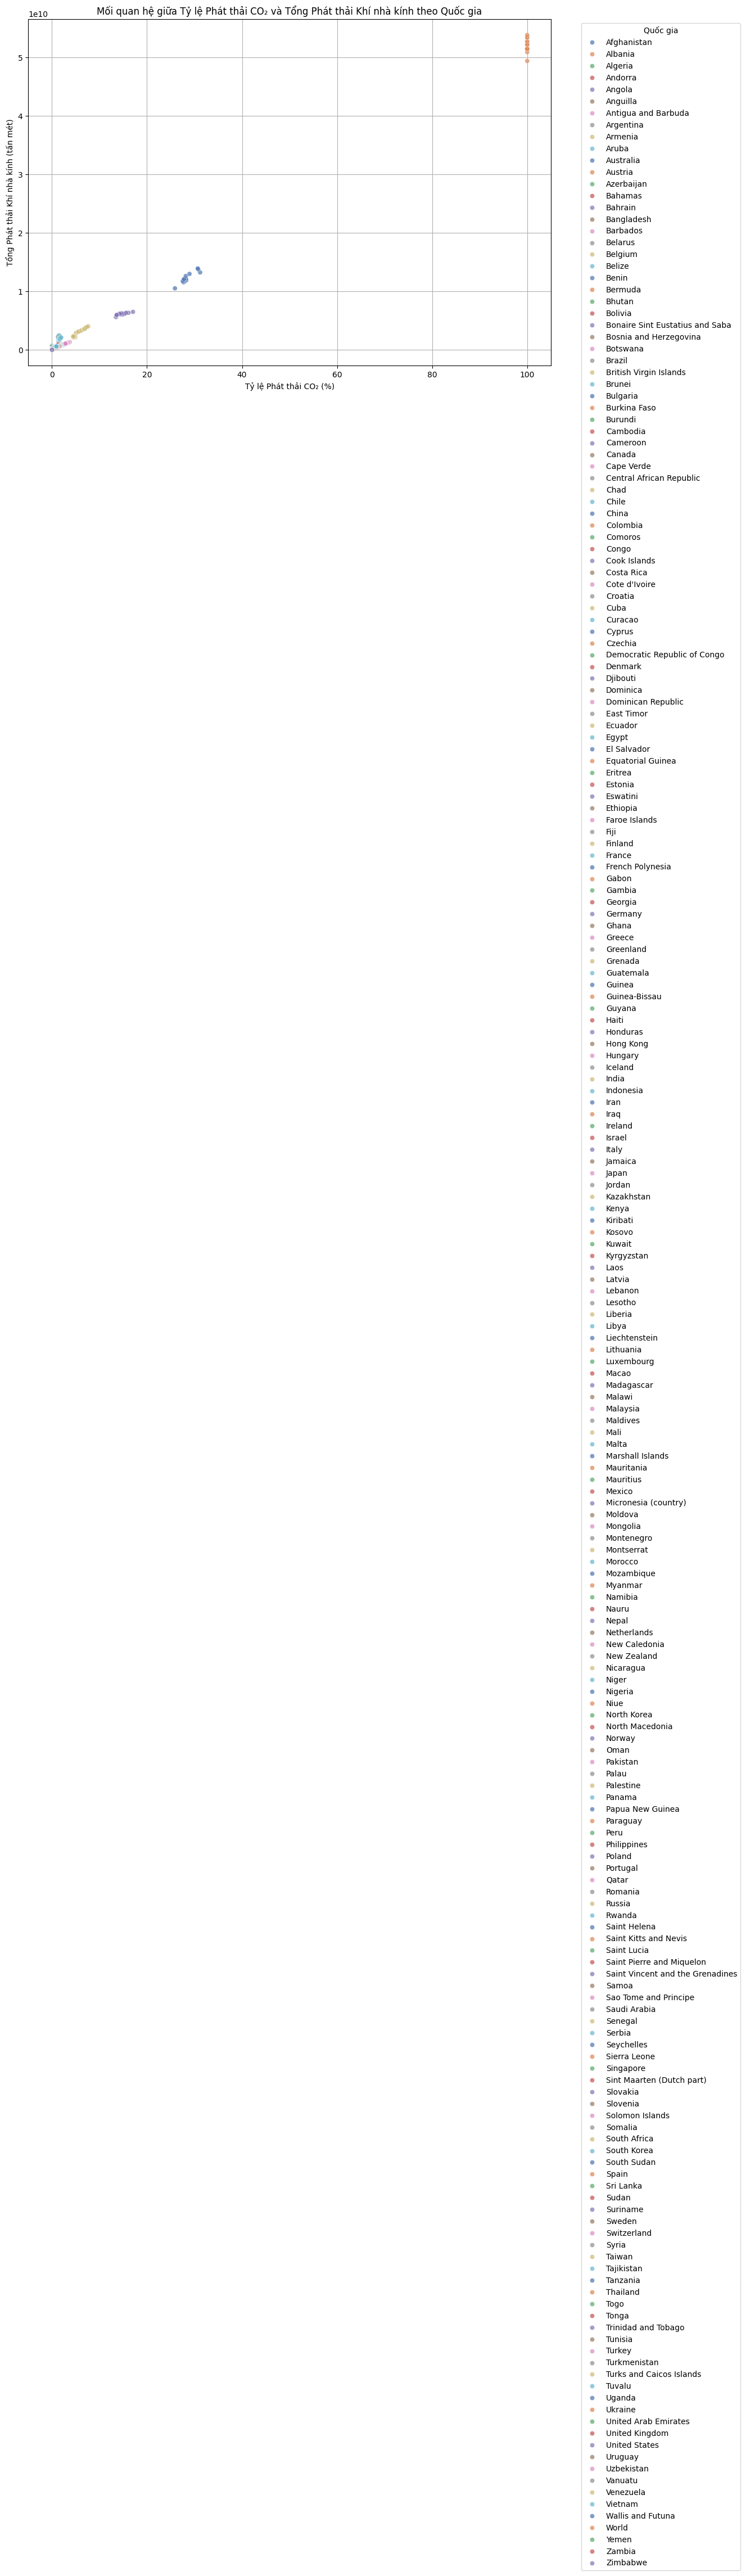

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='CO2_share', y='GHG_annual', hue='Country', palette='deep', alpha=0.7)
plt.title('Mối quan hệ giữa Tỷ lệ Phát thải CO₂ và Tổng Phát thải Khí nhà kính theo Quốc gia')
plt.xlabel('Tỷ lệ Phát thải CO₂ (%)')
plt.ylabel('Tổng Phát thải Khí nhà kính (tấn mét)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Phân bố Quốc gia**: Biểu đồ scatter cho thấy các quốc gia nằm ở đâu trong mối quan hệ giữa tỷ lệ phát thải CO₂ và tổng phát thải khí nhà kính.
  
- **Xu hướng Phụ thuộc**: Xác định liệu các quốc gia có tỷ lệ phát thải CO₂ cao có tổng phát thải khí nhà kính cao hơn hay không, cho thấy sự phụ thuộc vào CO₂ trong tổng phát thải.


### **Cách Tiếp Cận 3: Biến đổi Log để Trực quan hóa Tốt hơn**

#### **Giải thích**
Cả tỷ lệ phát thải CO₂ và tổng phát thải khí nhà kính có thể có phạm vi rộng, vì vậy biến đổi logarithm giúp tiết lộ các mối quan hệ trên một thang đo dễ hiểu hơn, đặc biệt là cho các quốc gia có giá trị rất cao hoặc thấp.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5780\3747314366.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


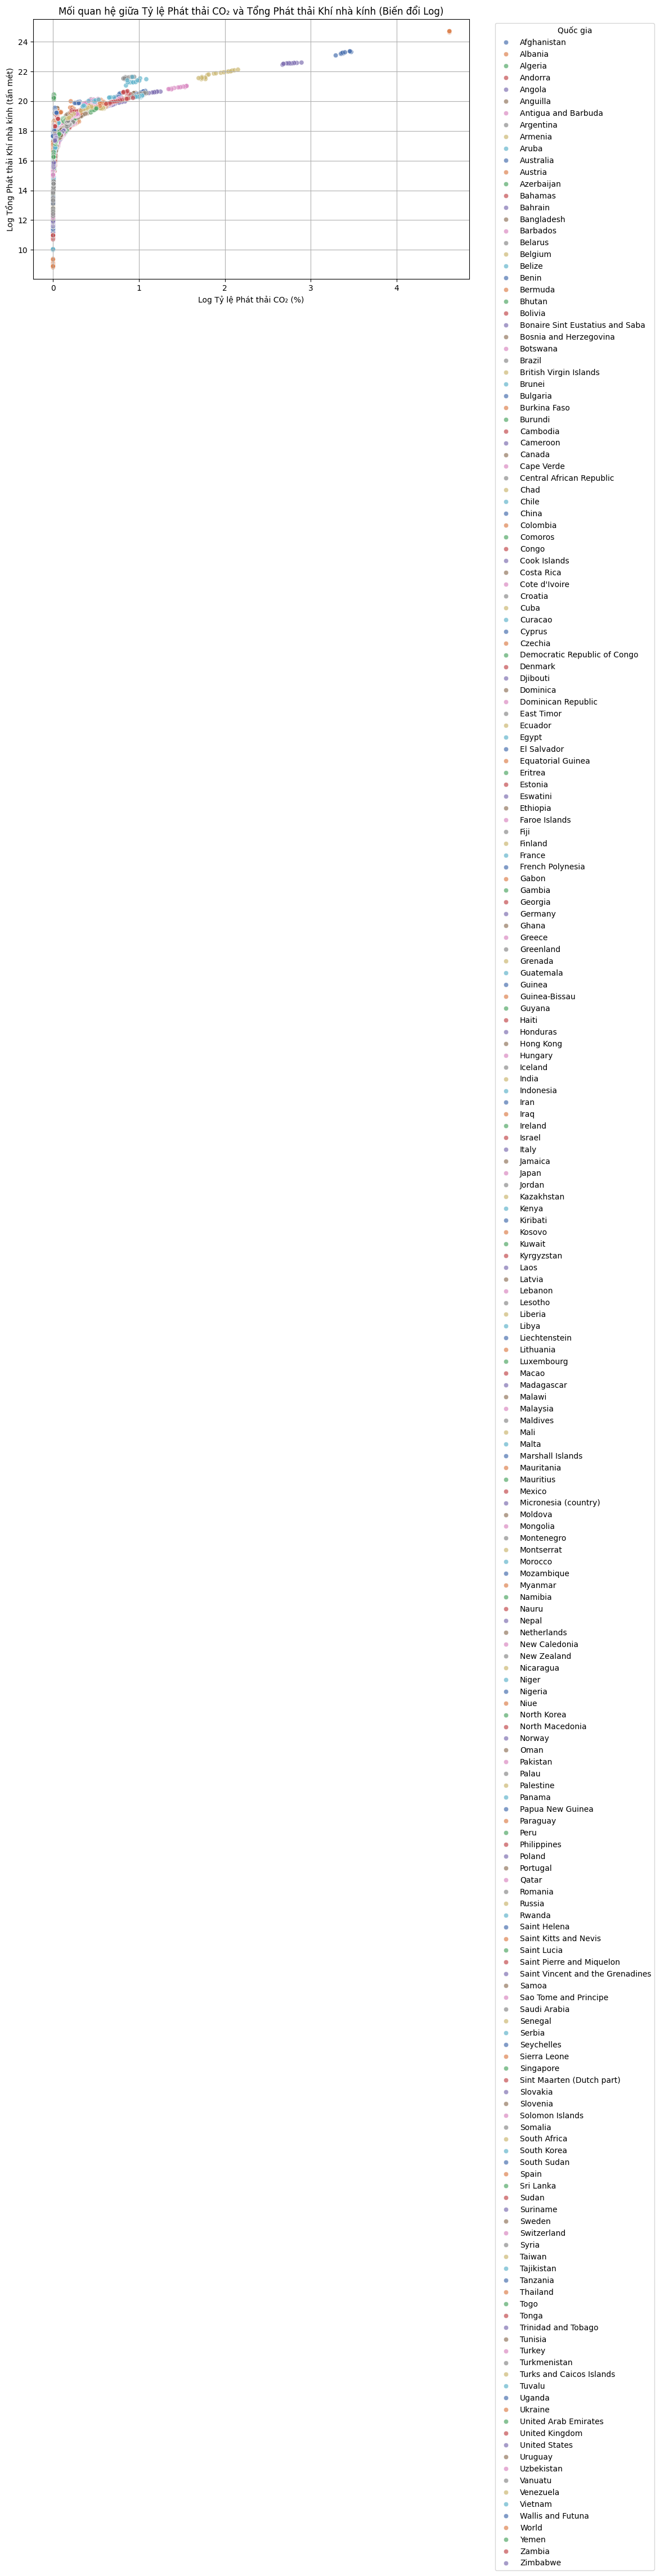

In [ ]:
df_cleaned['log_CO2_share'] = df_cleaned['CO2_share'].apply(lambda x: np.log(x + 1))
df_cleaned['log_GHG_annual'] = df_cleaned['GHG_annual'].apply(lambda x: np.log(x + 1))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='log_CO2_share', y='log_GHG_annual', hue='Country', palette='deep', alpha=0.7)
plt.title('Mối quan hệ giữa Tỷ lệ Phát thải CO₂ và Tổng Phát thải Khí nhà kính (Biến đổi Log)')
plt.xlabel('Log Tỷ lệ Phát thải CO₂ (%)')
plt.ylabel('Log Tổng Phát thải Khí nhà kính (tấn mét)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Trực quan hóa Tốt hơn**: Biến đổi log giúp làm rõ các mẫu có thể bị che khuất bởi các giá trị cực đoan trong tỷ lệ phát thải CO₂ hoặc tổng phát thải khí nhà kính.
  
- **Khám phá Giá trị Ngoại lai**: Nhận diện các quốc gia với tỷ lệ phát thải CO₂ hoặc tổng phát thải khí nhà kính cực kỳ cao hoặc thấp, giúp hiểu rõ hơn về tác động của họ đến môi trường.


## **Câu hỏi 3: Các nguồn năng lượng khác nhau đóng góp như thế nào vào phát thải CO₂ qua các năm?**

### **Cách Tiếp Cận 1: Biểu đồ Khu vực Phát thải CO₂ theo Nguồn Năng lượng**

#### **Giải thích**
Biểu đồ khu vực trực quan hóa cách mỗi nguồn năng lượng (than đá, khí đốt, dầu mỏ) đóng góp vào tổng phát thải CO₂ qua các năm, làm nổi bật sự thay đổi trong việc sử dụng năng lượng.


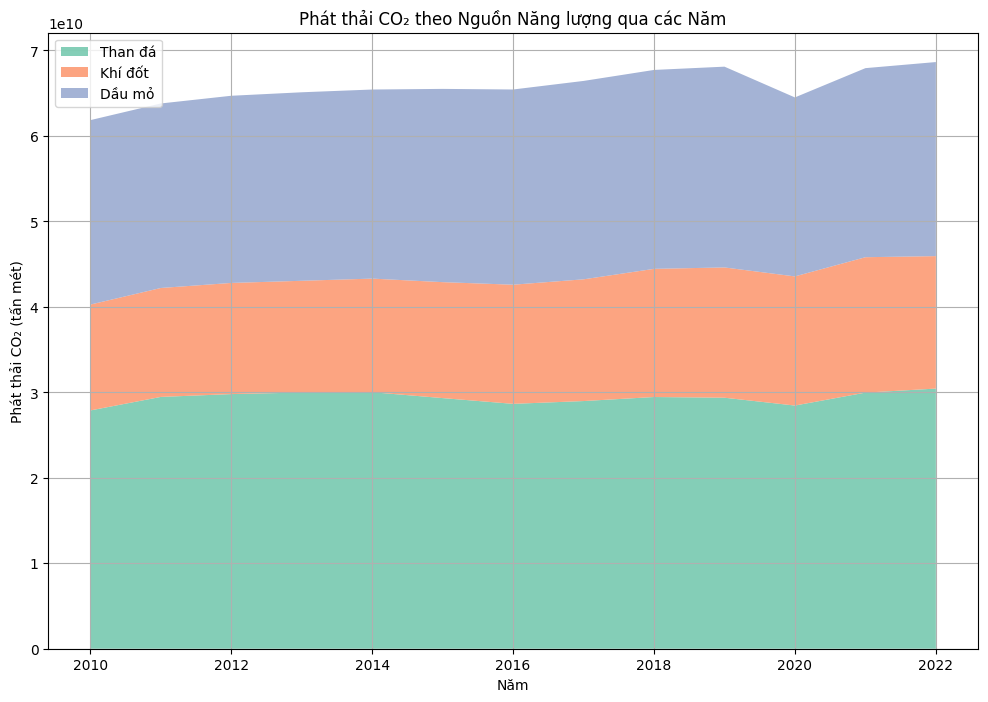

In [ ]:
df_energy_co2 = df_cleaned.groupby('Year')[['CO2_coal', 'CO2_gas', 'CO2_oil']].sum()

plt.figure(figsize=(12, 8))
plt.stackplot(df_energy_co2.index, df_energy_co2['CO2_coal'], df_energy_co2['CO2_gas'], df_energy_co2['CO2_oil'],
              labels=['Than đá', 'Khí đốt', 'Dầu mỏ'], alpha=0.8)
plt.title('Phát thải CO₂ theo Nguồn Năng lượng qua các Năm')
plt.xlabel('Năm')
plt.ylabel('Phát thải CO₂ (tấn mét)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


#### **Phân tích & Hiểu biết**
- **Đóng góp Tổng thể**: Biểu đồ khu vực cung cấp cái nhìn về cách mỗi nguồn năng lượng đóng góp vào tổng phát thải CO₂ qua thời gian.
  
- **Xu hướng Sử dụng Năng lượng**: Nhận diện bất kỳ sự chuyển đổi nào từ nguồn năng lượng này sang nguồn khác (ví dụ: giảm sử dụng than đá và tăng sử dụng khí đốt).


### **Cách Tiếp Cận 2: Phát thải CO₂ như Một Tỷ lệ của Tổng Phát thải**

#### **Giải thích**
Tính toán tỷ lệ của mỗi nguồn năng lượng trong tổng phát thải CO₂. Điều này làm nổi bật nguồn nào chiếm tỷ lệ lớn nhất và cách các tỷ lệ này thay đổi qua thời gian.


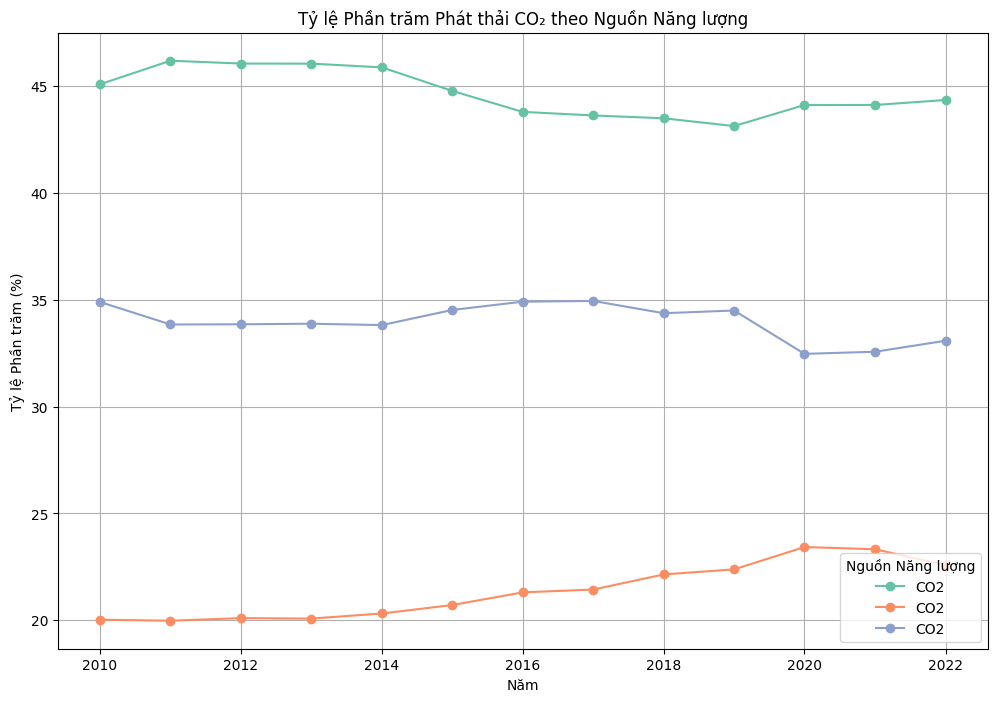

In [ ]:
df_energy_co2['total_CO2'] = df_energy_co2[['CO2_coal', 'CO2_gas', 'CO2_oil']].sum(axis=1)
for source in ['CO2_coal', 'CO2_gas', 'CO2_oil']:
    df_energy_co2[f'{source}_share'] = (df_energy_co2[source] / df_energy_co2['total_CO2']) * 100

plt.figure(figsize=(12, 8))
for source in ['CO2_coal_share', 'CO2_gas_share', 'CO2_oil_share']:
    plt.plot(df_energy_co2.index, df_energy_co2[source], marker='o', label=source.split('_')[0])

plt.title('Tỷ lệ Phần trăm Phát thải CO₂ theo Nguồn Năng lượng')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ Phần trăm (%)')
plt.legend(title='Nguồn Năng lượng')
plt.grid(True)
plt.show()


#### **Phân tích & Hiểu biết**
- **Tầm quan trọng của Nguồn Năng lượng**: Hiểu rõ nguồn năng lượng nào đóng góp nhiều nhất vào tổng phát thải CO₂.
  
- **Sự chuyển đổi Nguồn Năng lượng**: Xác định các năm có sự thay đổi đáng kể trong tỷ lệ phát thải từ các nguồn năng lượng, chẳng hạn như tăng sử dụng khí đốt thay vì than đá.


### **Cách Tiếp Cận 3: Phát thải CO₂ trên Đầu Người theo Nguồn Năng lượng**

#### **Giải thích**
Phân tích phát thải CO₂ trên đầu người cho mỗi nguồn năng lượng giúp cung cấp cái nhìn về đóng góp cá nhân của từng nguồn năng lượng vào phát thải. Điều này cho phép so sánh giữa các quốc gia với quy mô dân số khác nhau.


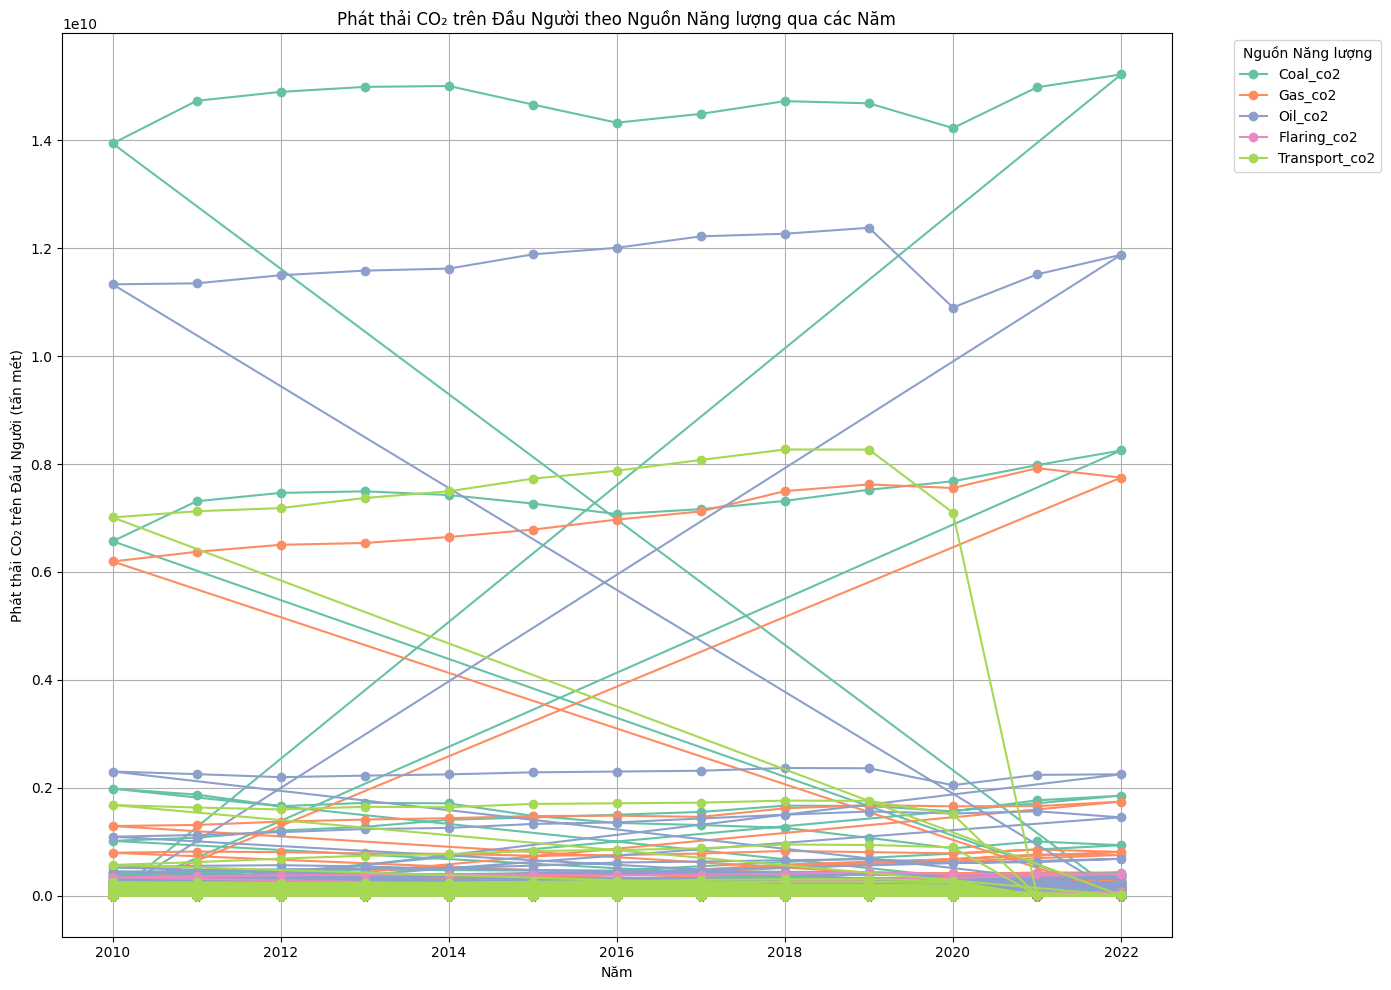

In [ ]:
df_cleaned['coal_CO2_pc'] = df_cleaned['CO2_coal'] / 1  # Giả sử đơn vị 'CO2_coal' là đã trên đầu người
df_cleaned['gas_CO2_pc'] = df_cleaned['CO2_gas'] / 1    # Giả sử đơn vị 'CO2_gas' là đã trên đầu người
df_cleaned['oil_CO2_pc'] = df_cleaned['CO2_oil'] / 1    # Giả sử đơn vị 'CO2_oil' là đã trên đầu người
df_cleaned['flaring_CO2_pc'] = df_cleaned['CO2_flaring'] / 1  # Giả sử đơn vị 'CO2_flaring' là đã trên đầu người
df_cleaned['transport_CO2_pc'] = df_cleaned['CO2_transport'] / 1  # Giả sử đơn vị 'CO2_transport' là đã trên đầu người

plt.figure(figsize=(14, 10))
for source in ['coal_CO2_pc', 'gas_CO2_pc', 'oil_CO2_pc', 'flaring_CO2_pc', 'transport_CO2_pc']:
    plt.plot(df_cleaned['Year'], df_cleaned[source], marker='o', label=source.replace('_pc', '').capitalize())

plt.title('Phát thải CO₂ trên Đầu Người theo Nguồn Năng lượng qua các Năm')
plt.xlabel('Năm')
plt.ylabel('Phát thải CO₂ trên Đầu Người (tấn mét)')
plt.legend(title='Nguồn Năng lượng', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Ảnh hưởng Cá nhân của Nguồn Năng lượng**: Hiểu cách mỗi nguồn năng lượng ảnh hưởng đến phát thải CO₂ trên đầu người, giúp đánh giá hiệu quả các biện pháp giảm phát thải.
  
- **Chính sách và Thực tiễn**: Cung cấp thông tin về nguồn năng lượng nào cần được ưu tiên trong các chính sách môi trường để giảm phát thải hiệu quả.


## **Câu hỏi 4: Phát thải CO₂ trên Đầu Người tại Việt Nam so với các quốc gia khác qua thời gian như thế nào?**

### **Cách Tiếp Cận 1: So sánh Phát thải CO₂ của Việt Nam với Trung bình Toàn cầu**

#### **Giải thích**
So sánh phát thải CO₂ trên đầu người của Việt Nam với trung bình toàn cầu qua các năm. Cách tiếp cận này giúp làm nổi bật vị trí của Việt Nam so với thế giới về mức phát thải CO₂ trên đầu người.


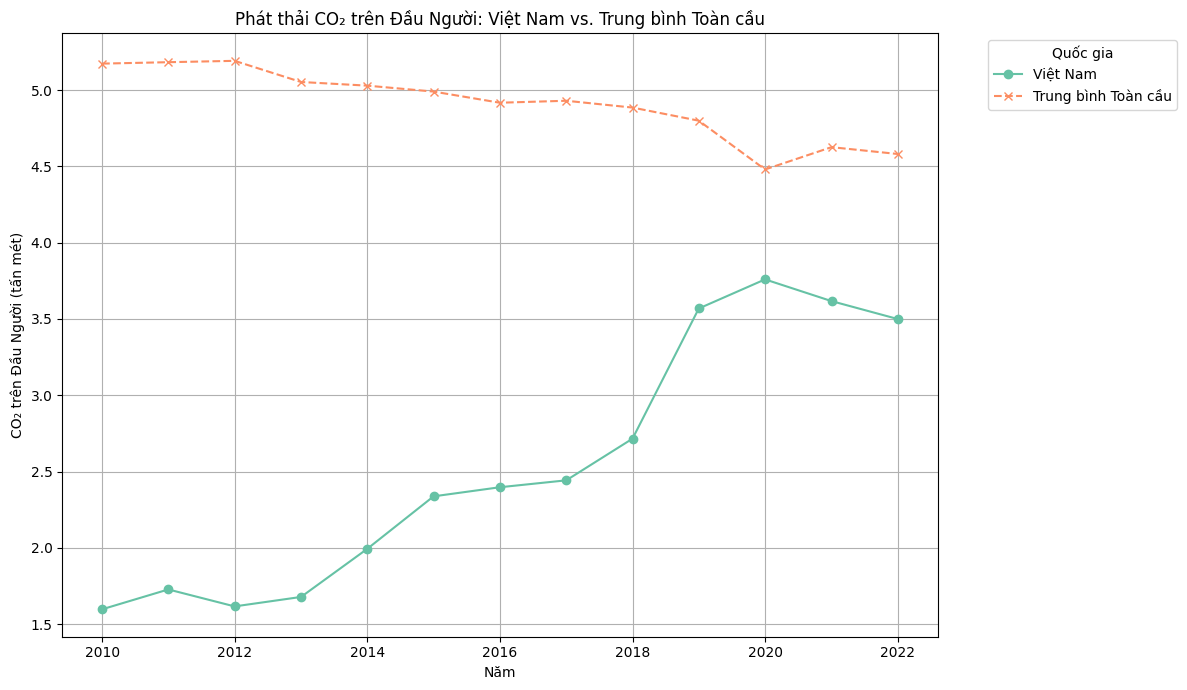

In [ ]:
global_avg_co2 = df_cleaned.groupby('Year')['CO2_pc'].mean()

vietnam_data = df_cleaned[df_cleaned['Country'] == 'Vietnam']

plt.figure(figsize=(12, 7))
plt.plot(vietnam_data['Year'], vietnam_data['CO2_pc'], marker='o', label='Việt Nam')
plt.plot(global_avg_co2.index, global_avg_co2, marker='x', linestyle='--', label='Trung bình Toàn cầu')
plt.title('Phát thải CO₂ trên Đầu Người: Việt Nam vs. Trung bình Toàn cầu')
plt.xlabel('Năm')
plt.ylabel('CO₂ trên Đầu Người (tấn mét)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Xu hướng Việt Nam vs. Toàn cầu**: Đánh giá liệu phát thải CO₂ của Việt Nam có tăng hoặc giảm so với xu hướng toàn cầu.
  
- **Nguyên nhân**: Liên kết các biến động phát thải với các chính sách, sự kiện kinh tế hoặc chuyển đổi năng lượng tại Việt Nam.


### **Cách Tiếp Cận 2: So sánh Việt Nam với Các Quốc gia Lân cận**

#### **Giải thích**
Để cung cấp một so sánh có bối cảnh hơn, so sánh phát thải CO₂ trên đầu người của Việt Nam với các quốc gia láng giềng trong khu vực ASEAN.


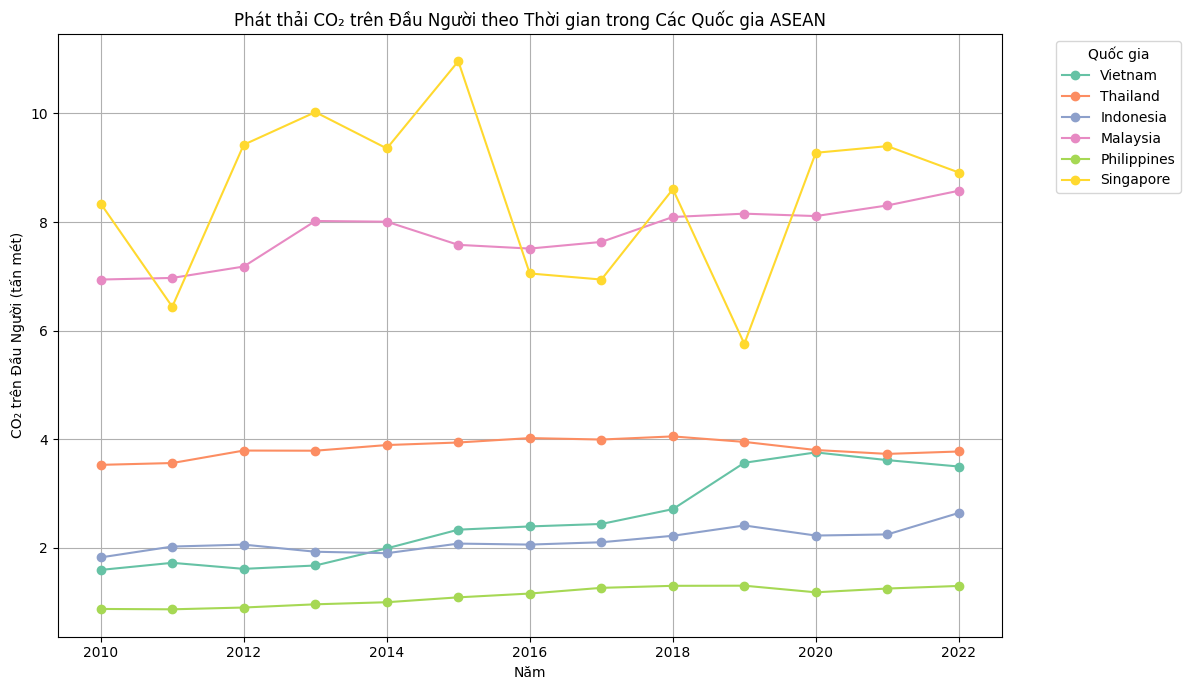

In [ ]:
asean_countries = ['Vietnam', 'Thailand', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore']

df_asean = df_cleaned[df_cleaned['Country'].isin(asean_countries)]

plt.figure(figsize=(12, 7))
for country in asean_countries:
    country_data = df_asean[df_asean['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_pc'], marker='o', label=country)

plt.title('Phát thải CO₂ trên Đầu Người theo Thời gian trong Các Quốc gia ASEAN')
plt.xlabel('Năm')
plt.ylabel('CO₂ trên Đầu Người (tấn mét)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Bối cảnh Khu vực**: Hiểu vị trí của Việt Nam so với các quốc gia láng giềng trong ASEAN về mức phát thải CO₂ trên đầu người.
  
- **Sự Cải thiện hoặc Tăng trưởng**: Xác định liệu Việt Nam đang cải thiện hoặc tăng trưởng phát thải so với các nước khác trong khu vực.


### **Cách Tiếp Cận 3: Đánh giá Tỷ lệ Tăng trưởng Phát thải của Việt Nam so với Các Quốc gia Hàng đầu**

#### **Giải thích**
Tính toán và trực quan hóa tỷ lệ tăng trưởng trong phát thải CO₂ trên đầu người của Việt Nam so với các quốc gia hàng đầu trong tập dữ liệu. Điều này làm nổi bật tốc độ thay đổi của phát thải so với các quốc gia khác.


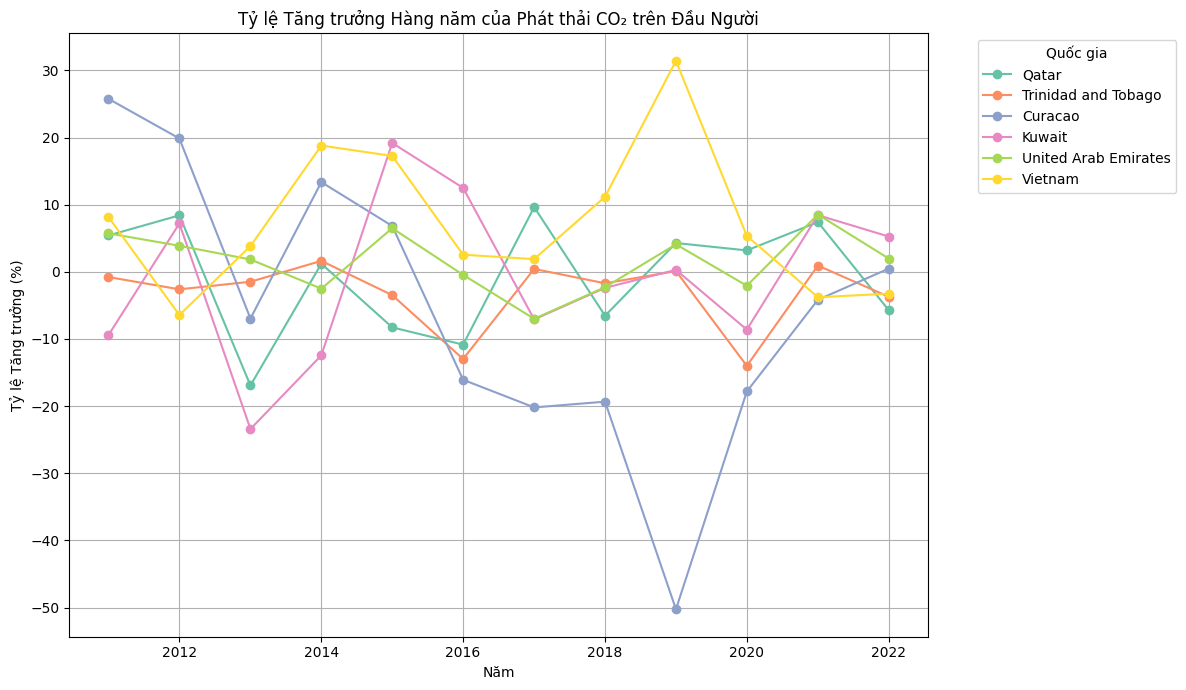

In [ ]:
top_emitters = df_cleaned.groupby('Country')['CO2_pc'].mean().nlargest(5).index
countries_to_compare = list(top_emitters) + ['Vietnam']
df_comparison = df_cleaned[df_cleaned['Country'].isin(countries_to_compare)]

plt.figure(figsize=(12, 7))
for country in countries_to_compare:
    country_data = df_comparison[df_comparison['Country'] == country].copy()
    country_data['CO2_pc_growth_rate'] = country_data['CO2_pc'].pct_change() * 100
    plt.plot(country_data['Year'], country_data['CO2_pc_growth_rate'], marker='o', label=country)

plt.title('Tỷ lệ Tăng trưởng Hàng năm của Phát thải CO₂ trên Đầu Người')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ Tăng trưởng (%)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **So sánh Tỷ lệ Tăng trưởng**: Đánh giá liệu Việt Nam có đang tăng hoặc giảm phát thải nhanh hơn so với các nước phát thải cao nhất.
  
- **Nguyên nhân Động lực**: Thảo luận về các lý do có thể dẫn đến sự thay đổi nhanh chóng trong phát thải của Việt Nam, chẳng hạn như chính sách kinh tế, đầu tư vào năng lượng sạch hoặc tăng trưởng dân số.


## **Câu hỏi 5: Phát thải CO₂ trên Đầu Người của Việt Nam so với tỷ lệ phát thải CO₂ trên toàn cầu là gì?**

### **Cách Tiếp Cận 1: So sánh Phát thải CO2 của Việt Nam với Tỷ lệ Phát thải toàn cầu**

#### **Giải thích**
So sánh phát thải CO₂ trên đầu người của Việt Nam với tỷ lệ phát thải CO₂ trên toàn cầu để hiểu vị trí của Việt Nam trong bối cảnh toàn cầu.


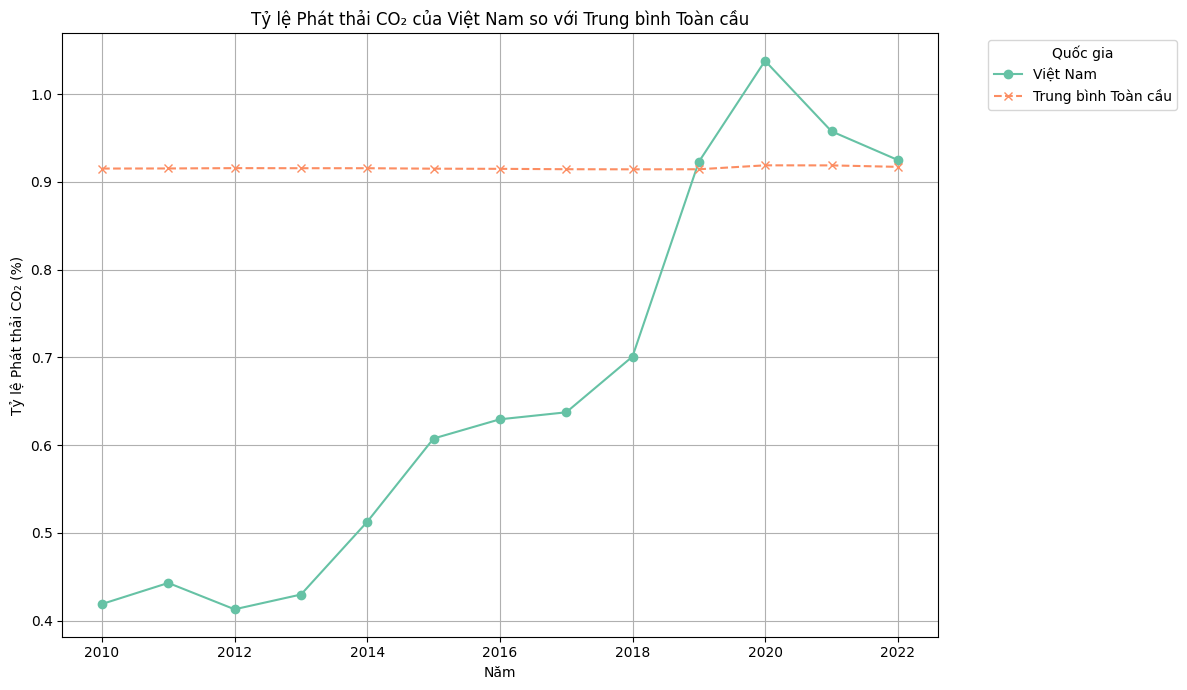

In [ ]:
global_avg_co2_share = df_cleaned.groupby('Year')['CO2_share'].mean()

vietnam_data = df_cleaned[df_cleaned['Country'] == 'Vietnam']

plt.figure(figsize=(12, 7))
plt.plot(vietnam_data['Year'], vietnam_data['CO2_share'], marker='o', label='Việt Nam')
plt.plot(global_avg_co2_share.index, global_avg_co2_share, marker='x', linestyle='--', label='Trung bình Toàn cầu')
plt.title('Tỷ lệ Phát thải CO₂ của Việt Nam so với Trung bình Toàn cầu')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ Phát thải CO₂ (%)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Việt Nam vs. Toàn cầu**: Đánh giá liệu tỷ lệ phát thải CO₂ của Việt Nam có cao hơn hoặc thấp hơn so với trung bình toàn cầu.
  
- **Xu hướng So sánh**: Xác định liệu tỷ lệ phát thải của Việt Nam có tăng hoặc giảm so với trung bình toàn cầu, cung cấp cái nhìn về hiệu quả các chính sách môi trường.


### **Cách Tiếp Cận 2: So sánh Việt Nam với Các Quốc gia ASEAN**

#### **Giải thích**
So sánh tỷ lệ phát thải CO₂ của Việt Nam với các quốc gia láng giềng trong ASEAN để hiểu vị trí của Việt Nam trong khu vực.


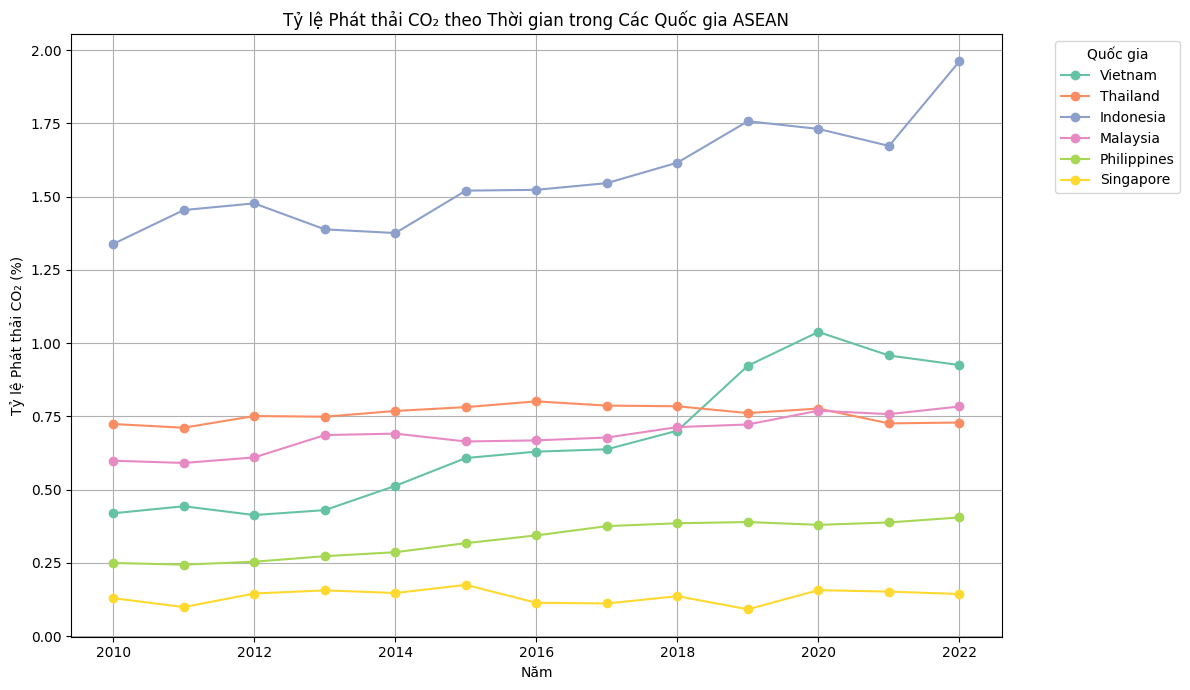

In [ ]:
asean_countries = ['Vietnam', 'Thailand', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore']

df_asean = df_cleaned[df_cleaned['Country'].isin(asean_countries)]

plt.figure(figsize=(12, 7))
for country in asean_countries:
    country_data = df_asean[df_asean['Country'] == country]
    plt.plot(country_data['Year'], country_data['CO2_share'], marker='o', label=country)

plt.title('Tỷ lệ Phát thải CO₂ theo Thời gian trong Các Quốc gia ASEAN')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ Phát thải CO₂ (%)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **Bối cảnh Khu vực**: Hiểu vị trí của Việt Nam so với các quốc gia ASEAN về tỷ lệ phát thải CO₂.
  
- **Sự Cải thiện hoặc Tăng trưởng**: Xác định liệu Việt Nam đang cải thiện hoặc tăng trưởng tỷ lệ phát thải so với các nước khác trong khu vực.


### **Cách Tiếp Cận 3: Đánh giá Tỷ lệ Tăng trưởng Phát thải của Việt Nam so với Các Quốc gia Hàng đầu ASEAN**

#### **Giải thích**
Tính toán và trực quan hóa tỷ lệ tăng trưởng trong phát thải CO₂ trên đầu người của Việt Nam so với các quốc gia hàng đầu trong ASEAN. Điều này làm nổi bật tốc độ thay đổi của phát thải so với các quốc gia khác trong khu vực.


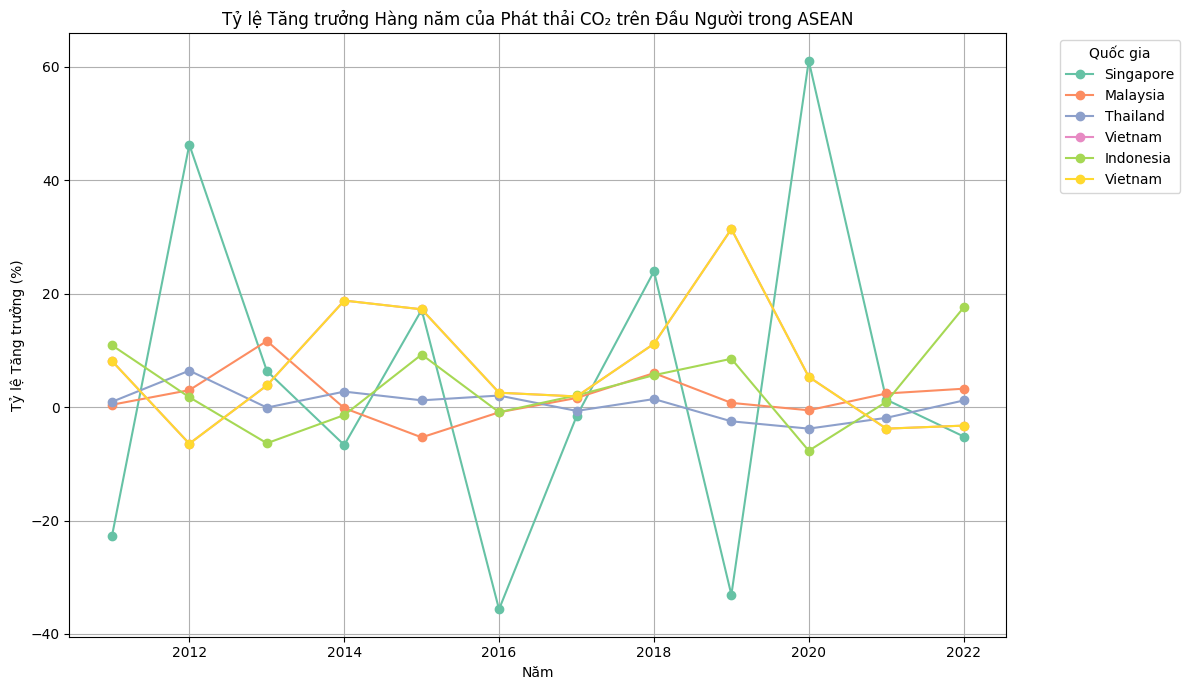

In [ ]:
top_emitters_asean = df_asean.groupby('Country')['CO2_pc'].mean().nlargest(5).index
countries_to_compare = list(top_emitters_asean) + ['Vietnam']
df_comparison_asean = df_cleaned[df_cleaned['Country'].isin(countries_to_compare)]

plt.figure(figsize=(12, 7))
for country in countries_to_compare:
    country_data = df_comparison_asean[df_comparison_asean['Country'] == country].copy()
    country_data['CO2_pc_growth_rate'] = country_data['CO2_pc'].pct_change() * 100
    plt.plot(country_data['Year'], country_data['CO2_pc_growth_rate'], marker='o', label=country)

plt.title('Tỷ lệ Tăng trưởng Hàng năm của Phát thải CO₂ trên Đầu Người trong ASEAN')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ Tăng trưởng (%)')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Phân tích & Hiểu biết**
- **So sánh Tỷ lệ Tăng trưởng**: Đánh giá liệu Việt Nam có đang tăng hoặc giảm phát thải nhanh hơn so với các nước phát thải cao nhất trong ASEAN.
  
- **Nguyên nhân Động lực**: Thảo luận về các lý do có thể dẫn đến sự thay đổi nhanh chóng trong phát thải của Việt Nam, chẳng hạn như chính sách kinh tế, đầu tư vào năng lượng sạch hoặc tăng trưởng dân số.


## **Tổng kết Các Điểm Phân tích Chính**
1. **Hiểu Ý Nghĩa Các Cột Dữ liệu**: Cung cấp bối cảnh cho việc giải thích dữ liệu.
2. **Kiểm tra Kiểu Dữ liệu và Phạm vi Giá trị**: Đảm bảo chất lượng và tính nhất quán của dữ liệu.
3. **Thống kê Mô tả**: Hiểu rõ phạm vi, trung bình và độ lệch của các biến số.
4. **Đánh giá Giá trị Thiếu và Xử lý Ngoại lai**: Xác định các vấn đề tiềm ẩn và làm sạch dữ liệu.
5. **Phân tích Ma trận Tương Quan**: Hiểu mối quan hệ giữa các biến số.
6. **Phân tích Xu hướng Thời gian**: Nhận diện các xu hướng và phân bố dữ liệu theo thời gian và địa lý.
7. **So sánh và Phân cụm Quốc gia**: Xác định các mẫu và sự tương đồng giữa các quốc gia.
8. **Tính toán Tỷ lệ và Chỉ số**: Hiểu sự đóng góp tương đối của các quốc gia vào tổng phát thải.
9. **Phân rã Thay đổi Phát thải**: Hiểu nguyên nhân đằng sau các thay đổi trong phát thải CO₂.